## Implementing Logistic Regression from Scratch

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


### Importing the dataset

In [3]:
diabetes_df = pd.read_csv('health care diabetes.csv')
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

##### (a) (3 marks) Perform Logistic regression on the given dataset. Plot training loss v/s iteration, validation v/s iteration and training accuracy v/s iteration, validation accuracy v/s iteration. Comment on the convergence of the model. Compare and analyze the plots.

### Defining the Functions

#### Sigmoid Function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Loss Function

In [5]:
def loss(h, y):
    h = np.where(h == 1, 0.999999, h)
    h = np.where(h == 0, 0.000001, h)

    loss_value_obtd_ = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss_value_obtd_

#### Prediction Function

In [6]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta)).round()

#### Accuracy Function

In [7]:
def accuracy(Y_test, Y_pred):
    # correct = 0
    # for i in range(len(Y_test)):
    #     if Y_test[i] == Y_pred[i]:
    #         correct += 1
    # return (correct / float(len(Y_test))) * 100.0
    correct_predictions = [1 if Y_test[i] == Y_pred[i] else 0 for i in range(len(Y_test))].count(1)
    return (correct_predictions / float(len(Y_test))) * 100.0

#### Defining SGD Function

In [8]:
def SGD(X, y, x_v, y_v, alpha, iters):
    w = np.random.randn(X.shape[1])
    m = len(y)
    loss_arr = []
    x_ = np.array(X)
    y_ = np.array(y)
    val_acc = []
    train_acc = []
    for i in range(iters):

        for j in range(m):
            z = np.dot(X[j], w)
            h = sigmoid(z)
            gradient = np.dot(X[j].T, (h - y[j]))
            w -= alpha * gradient

        z = np.dot(X, w)
        h = sigmoid(z)
        loss_value = loss(h, y)
        loss_arr.append(loss_value)

        y_pred = predict(x_v, w)
        val_accur = accuracy(y_v, y_pred)
        val_acc.append(val_accur)

        y_pred = predict(X, w)
        train_accur = accuracy(y, y_pred)
        train_acc.append(train_accur)

    return w, loss_arr, val_acc, train_acc

#### Splitting the data into 70 : 20 : 10 ratio of train-test-validation

In [9]:
def LR(alpha, iters):
    diabetes_df = pd.read_csv('./health care diabetes.csv')

    X = diabetes_df.iloc[:, :-1].values
    y = diabetes_df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_df['Outcome'], test_size = 0.3, random_state = 0)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size = 0.33, random_state = 0)
    theta, loss_val, val_acc, train_acc = SGD(X_train, y_train, X_val, y_val, alpha, iters)

    y_pred = predict(X_test, theta)
    accur = accuracy(y_test, y_pred)
    print(f"--->Accuracy for {alpha} LR & {iters} iter is:", accur)
    cm = confusion_matrix(y_test, y_pred)
    # print(f'Confusion Matrix: \n{cm}')
    # print(classification_report(y_test, y_pred))

    clf = linear_model.SGDClassifier(loss = 'log', alpha = alpha, max_iter = iters, tol = 1e-3, random_state = 0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accur_sk = clf.score(X_test, y_test);
    print('--->Accuracy by sklearn:',accur_sk)
    print('---------------------------------------------------------\n')
    return accur, accur_sk, loss_val, val_acc, train_acc


In [10]:
accur, accur_sk, loss_val, val_acc, train_acc = LR(0.0001, 1000)

--->Accuracy for 0.0001 LR & 1000 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


### Alpha =0.001

### Loss Curve v/s Iterations

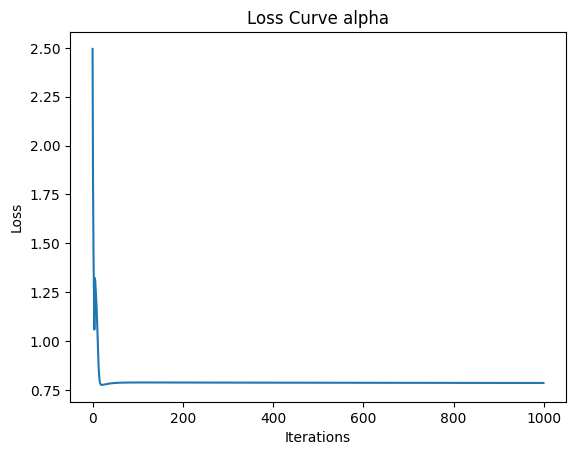

In [11]:
plt.plot(loss_val)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve alpha')
plt.show()

### Training Accuracy v/s Iterations

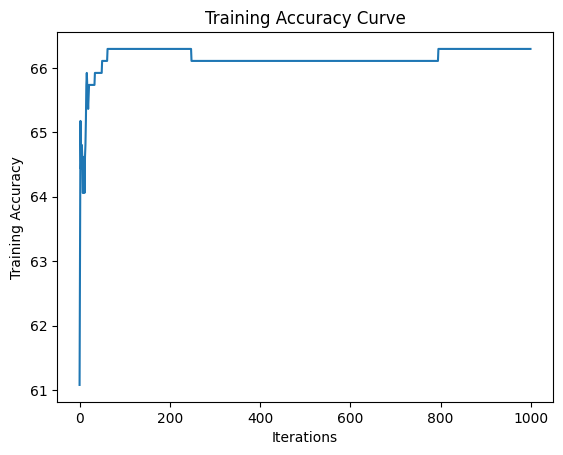

In [12]:
plt.plot(train_acc)
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

### Validation Accuracy v/s Iterations

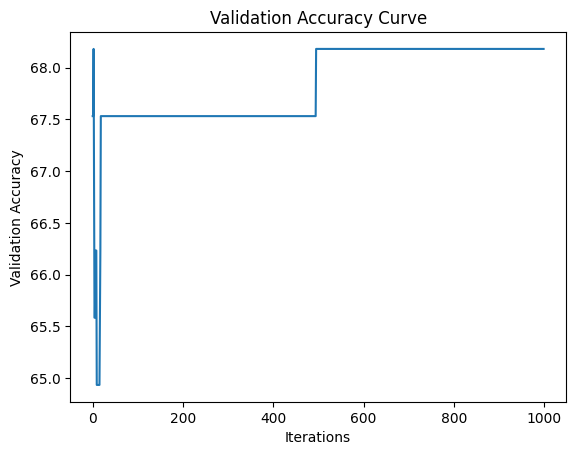

In [13]:
plt.plot(val_acc)
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve')

plt.show()

In [14]:
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = [50, 100, 500, 1000]

accur_arr = []
train_accur = []
loss_arr = []
for i in alpha:
    temp_arr = []
    temp_arr1 = []
    temp_arr2 = []
    for j in iters:
        accur, accur_sk, loss_val, val_acc, train_acc = LR(i, j)
        temp_arr.append(accur)
        temp_arr2.append(train_acc)
        temp_arr1.append(loss_val)

    accur_arr.append(temp_arr)
    train_accur.append(temp_arr2)
    loss_arr.append(temp_arr1)

<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 1 LR & 50 iter is: 70.12987012987013
--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 1 LR & 100 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 1 LR & 500 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 1 LR & 1000 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.1 LR & 50 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.6233766233766234
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.1 LR & 100 iter is: 68.83116883116884
--->Accuracy by sklearn: 0.6233766233766234
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.1 LR & 500 iter is: 68.83116883116884
--->Accuracy by sklearn: 0.6233766233766234
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.1 LR & 1000 iter is: 63.63636363636363
--->Accuracy by sklearn: 0.6233766233766234
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.01 LR & 50 iter is: 63.63636363636363
--->Accuracy by sklearn: 0.6363636363636364
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.01 LR & 100 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.37662337662337664
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.01 LR & 500 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.37662337662337664
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-4-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


--->Accuracy for 0.01 LR & 1000 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.37662337662337664
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.001 LR & 50 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.001 LR & 100 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.001 LR & 500 iter is: 70.12987012987013
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.001 LR & 1000 iter is: 67.53246753246754
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.0001 LR & 50 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.0001 LR & 100 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.0001 LR & 500 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 0.0001 LR & 1000 iter is: 66.23376623376623
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 1e-05 LR & 50 iter is: 64.93506493506493
--->Accuracy by sklearn: 0.6753246753246753
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 1e-05 LR & 100 iter is: 71.42857142857143
--->Accuracy by sklearn: 0.6753246753246753
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 1e-05 LR & 500 iter is: 74.02597402597402
--->Accuracy by sklearn: 0.6753246753246753
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


--->Accuracy for 1e-05 LR & 1000 iter is: 71.42857142857143
--->Accuracy by sklearn: 0.6753246753246753
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


### Loss curves with varying alpha and total number of iterations

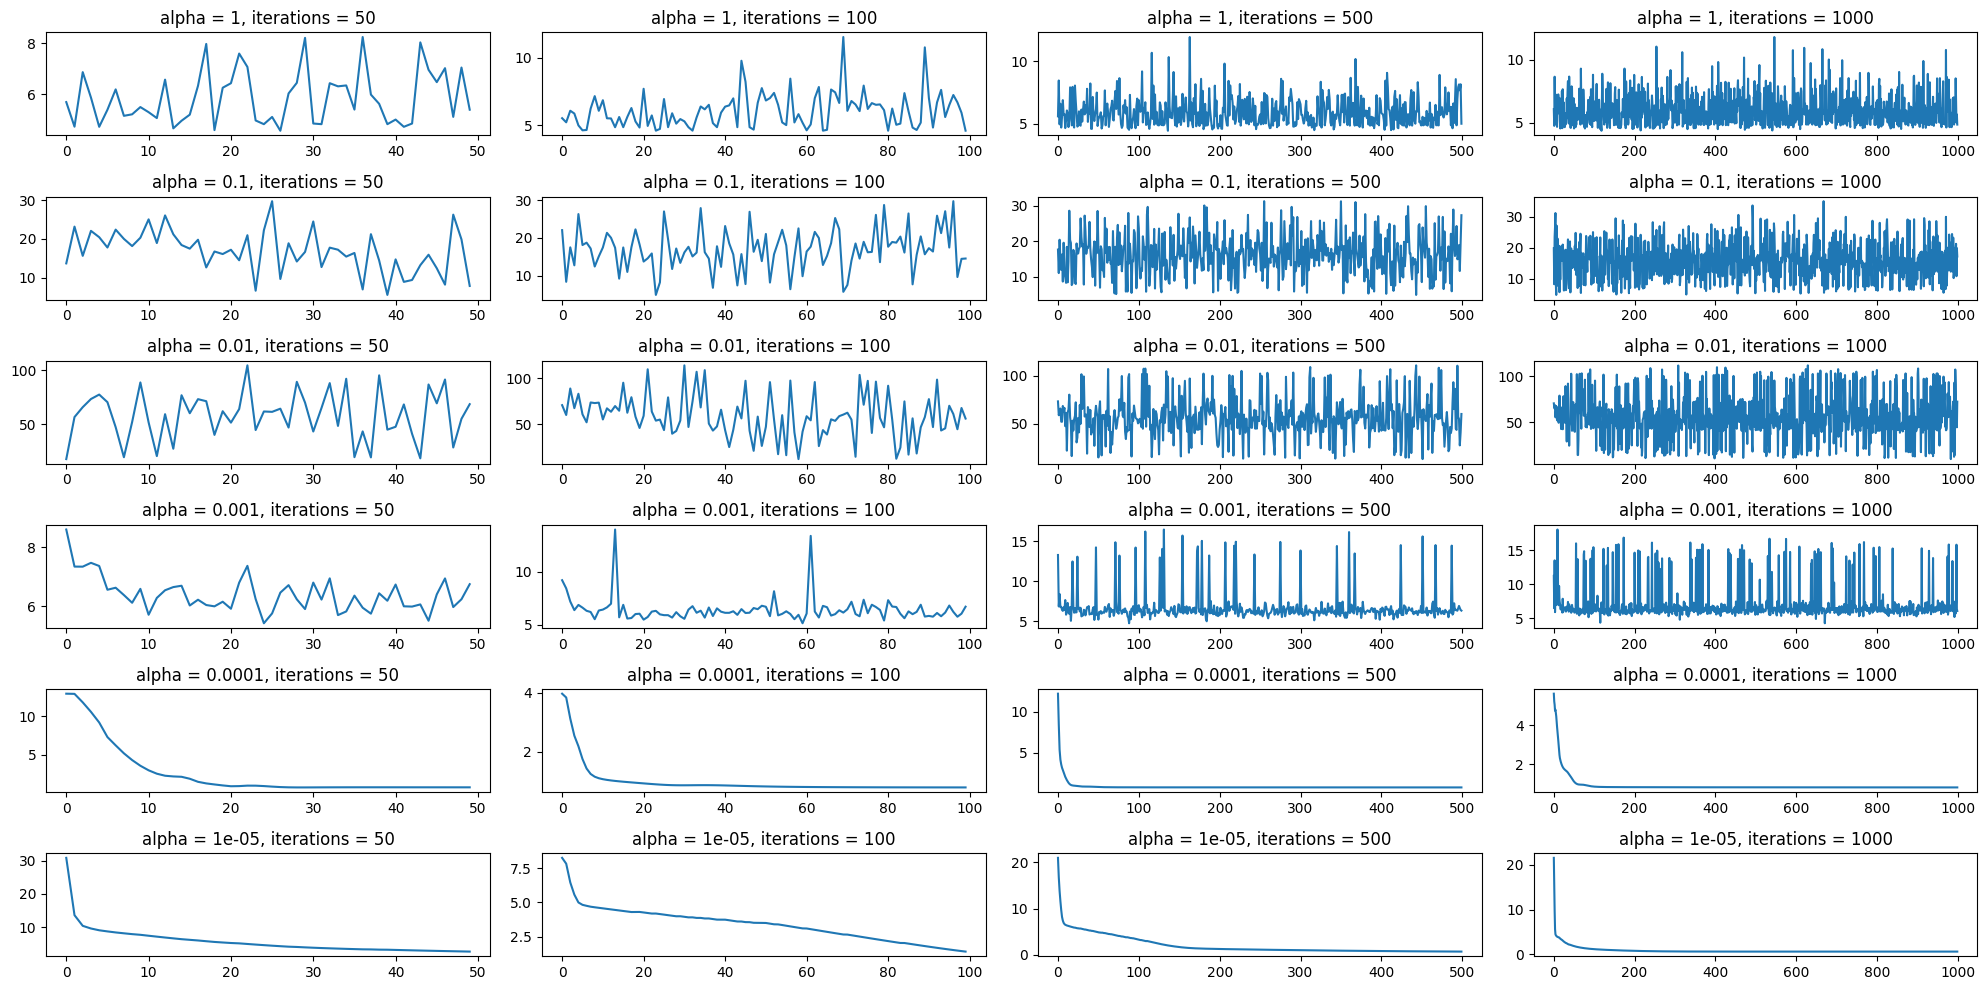

In [15]:
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(loss_arr[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iterations = {iters[j]}')
plt.tight_layout()
plt.show()

### Training Accuracy Curves with Varying Alpha and Total Number of Iterations

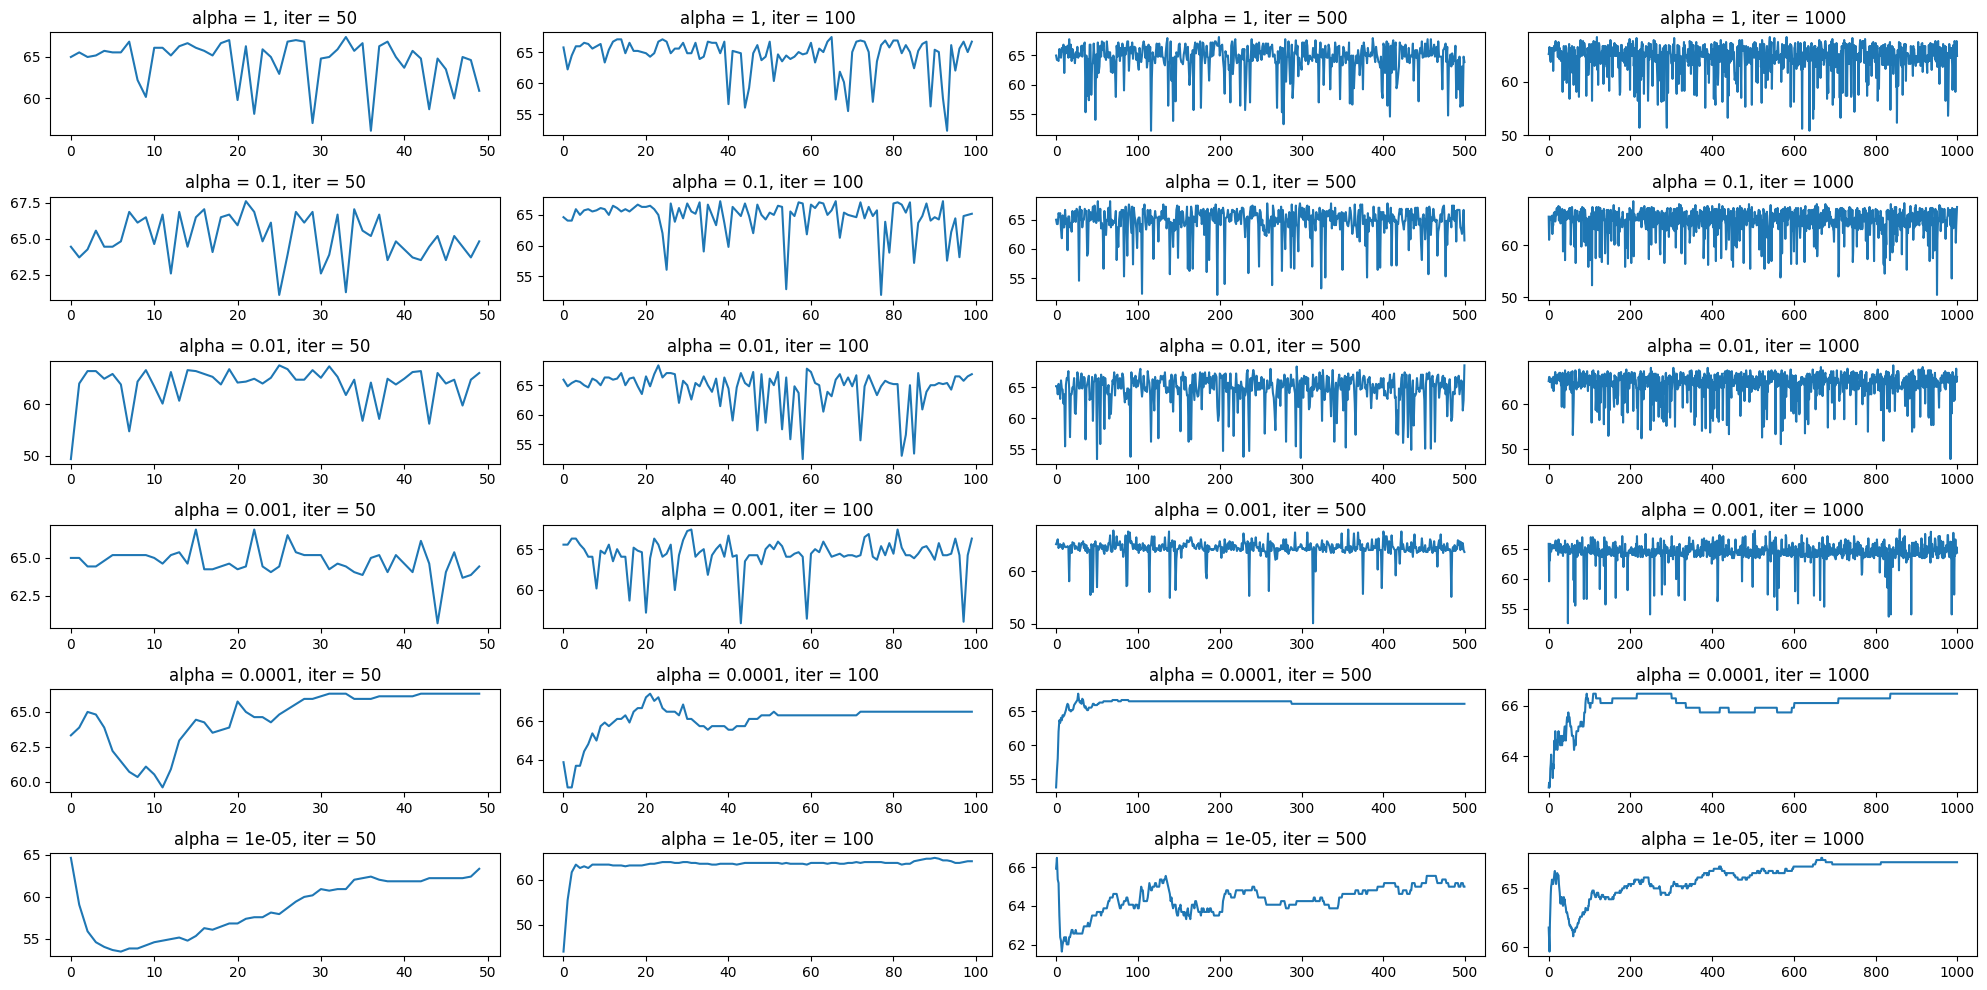

In [16]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(train_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

# L1 & L2 Regularization

In [17]:
# Implementing SGD with L1 regularization
def SGD_L1(X, y, x_v, y_v, alpha, iters, lam):
    #Randomly initializing the weights
    w = np.random.randn(X.shape[1])
    m = len(y)
    loss_arr = []
    x_ = np.array(X)
    y_ = np.array(y)
    val_acc = []
    train_acc = []
    #Implementing Stochoistic Gradient Descent for iters iterations
    for i in range(iters):
        # Now iterating over each data point and updating the weights
        for j in range(m):
            z = np.dot(X[j], w)
            h = sigmoid(z)
            gradient = np.dot(X[j].T, (h - y[j]))
            w -= alpha * gradient
            w[1:] -= lam * alpha * np.sign(w[1:])
        #Calculating the loss
        z = np.dot(X, w)
        h = sigmoid(z)
        loss_value = loss(h, y)
        loss_arr.append(loss_value)

        #Calculating the validation loss
        y_pred = predict(x_v, w)
        val_accur = accuracy(y_v, y_pred)
        val_acc.append(val_accur)

        # Calculating training accuracy
        y_pred = predict(X, w)
        train_accur = accuracy(y, y_pred)
        train_acc.append(train_accur)

    return w, loss_arr, val_acc, train_acc

In [18]:
# Implementing SGD with L2 regularization
def SGD_L2(X, y, x_v, y_v, alpha, iters, lam):
    #Randomly initializing the weights
    w = np.random.randn(X.shape[1])
    m = len(y)
    loss_arr = []
    x_ = np.array(X)
    y_ = np.array(y)
    val_acc = []
    train_acc = []
    #Implementing Stochoistic Gradient Descent for iters iterations
    for i in range(iters):
        # Now iterating over each data point and updating the weights
        for j in range(m):
            z = np.dot(X[j], w)
            h = sigmoid(z)
            gradient = np.dot(X[j].T, (h - y[j]))
            w -= alpha * gradient

            w[1:] -= lam * alpha * w[1:]

        #Calculating the loss
        z = np.dot(X, w)
        h = sigmoid(z)
        loss_value = loss(h, y)
        loss_arr.append(loss_value)

        #Calculating the validation loss
        y_pred = predict(x_v, w)
        val_accur = accuracy(y_v, y_pred)
        val_acc.append(val_accur)

        # Calculating training accuracy
        y_pred = predict(X, w)
        train_accur = accuracy(y, y_pred)
        train_acc.append(train_accur)

    return w, loss_arr, val_acc, train_acc

In [19]:
# Making a centralized function that takes alpha, iters, lam, and penalty as input and returns the complete analysis
def LR_reg(alpha, iters, lam, penalty):
    # Reading the data
    diabetes_df = pd.read_csv('./health care diabetes.csv')

    # Splitting the data into train and test
    X = diabetes_df.iloc[:, :-1].values
    y = diabetes_df.iloc[:, -1].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_df['Outcome'], test_size = 0.3, random_state = 0)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size = 0.33, random_state = 0)

    # Implementing Logistic Regression from scratch
    if penalty == 'l1':
        theta, loss_val, val_acc, train_acc = SGD_L1(X_train, y_train, X_val, y_val, alpha, iters, lam)
    else:
        theta, loss_val, val_acc, train_acc = SGD_L2(X_train, y_train, X_val, y_val, alpha, iters, lam)

    # Predicting the values
    y_pred = predict(X_test, theta)
    accur = accuracy(y_test, y_pred)
    print("--------------------------------------------------------------------------------------------------------------")
    print(f"Alpha: {alpha}, max_iters: {iters}, Lam: {lam}, Reg: {penalty}")
    # Calculating the accuracy
    print(f"Accuracy:", accur)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix: \n{cm}')
    print(classification_report(y_test, y_pred))

    # Implementing Logistic Regression using sklearn
    clf = linear_model.SGDClassifier(loss = 'log', penalty=penalty ,alpha = alpha, max_iter = iters, tol = 1e-3, random_state = 0)
    clf.fit(X_train, y_train)

    # Predicting the values
    y_pred = clf.predict(X_test)

    #score
    accur_sk = clf.score(X_test, y_test)
    print('SkLearn Accuracy:',accur_sk)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix: \n{cm}')
    print("--------------------------------------------------------------------------------------------------------------\n")
    return accur, accur_sk, loss_val, val_acc, train_acc

## L1 Reg

In [20]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = [50, 100, 500, 1000]
lam = [0.1, 0.01, 0.001, 0.0001, 0.00001]
penalty = ['l1', 'l2']

val_accur = []
train_accur = []
loss_arr = []
accur_arr = []
accur_arr_sk = []

for i in alpha:
    temp_arr = []
    temp_arr1 = []
    temp_arr2 = []
    temp_arr6 = []
    temp_arr7 = []

    for j in iters:
        temp_arr3 = []
        temp_arr4 = []
        temp_arr5 = []
        temp_arr8 = []
        temp_arr9 = []
        for k in lam:
            accur, accur_sk, loss_val, val_acc, train_acc = LR_reg(i, j, k, 'l1')
            temp_arr3.append(loss_val)
            temp_arr4.append(val_acc)
            temp_arr5.append(train_acc)
            temp_arr8.append(accur)
            temp_arr9.append(accur_sk)

        temp_arr.append(temp_arr3)
        temp_arr1.append(temp_arr4)
        temp_arr2.append(temp_arr5)
        temp_arr6.append(temp_arr8)
        temp_arr7.append(temp_arr9)

    val_accur.append(temp_arr)
    train_accur.append(temp_arr1)
    loss_arr.append(temp_arr2)
    accur_arr.append(temp_arr6)
    accur_arr_sk.append(temp_arr7)

--------------------------------------------------------------------------------------------------------------
Alpha: 1, max_iters: 50, Lam: 0.1, Reg: l1
Accuracy: 62.33766233766234
Confusion Matrix: 
[[43  7]
 [22  5]]
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        50
           1       0.42      0.19      0.26        27

    accuracy                           0.62        77
   macro avg       0.54      0.52      0.50        77
weighted avg       0.58      0.62      0.58        77

SkLearn Accuracy: 0.6493506493506493
Confusion Matrix: 
[[50  0]
 [27  0]]
--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
Alpha: 1, max_iters: 50, Lam: 0.01, Reg: l1
Accuracy: 71.42857142857143
Confusion Matrix: 
[[42  8]
 [14 13]]
              precision    recall  f1-score  

In [22]:
# Make a blank df with columns as alpha, iters, lam, penalty, accuracy, accuracy_sk
accur_df = pd.DataFrame(columns = ['alpha', 'iters', 'lam', 'penalty', 'accuracy', 'accuracy_sk'])
warnings.filterwarnings('ignore')
for i in range(len(alpha)):
    for j in range(len(iters)):
        for k in range(len(lam)):
            accur_df = accur_df.append({'alpha': alpha[i], 'iters': iters[j], 'lam': lam[k], 'penalty': 'l1', 'accuracy': accur_arr[i][j][k], 'accuracy_sk': accur_arr_sk[i][j][k]}, ignore_index = True)
warnings.filterwarnings('default')
accur_df


alpha iters      lam penalty   accuracy  accuracy_sk
0          1    50  0.10000      l1  62.337662     0.649351
1          1    50  0.01000      l1  71.428571     0.649351
2          1    50  0.00100      l1  64.935065     0.649351
3          1    50  0.00010      l1  66.233766     0.649351
4          1    50  0.00001      l1  64.935065     0.649351
..       ...   ...      ...     ...        ...          ...
115  0.00001  1000  0.10000      l1  68.831169     0.688312
116  0.00001  1000  0.01000      l1  68.831169     0.688312
117  0.00001  1000  0.00100      l1  68.831169     0.688312
118  0.00001  1000  0.00010      l1  68.831169     0.688312
119  0.00001  1000  0.00001      l1  70.129870     0.688312

[120 rows x 6 columns]

## Changing activation function

In [23]:
# Change activation function to tanh
def sigmoid(z):
    return np.tanh(z)

# Defining new loss function for tanh
def loss(h, y):
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)

    # Compute the categorical cross-entropy loss
    loss = -np.sum(y * np.log(h)) / len(y)
    return loss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Calling LR function for alpha = 0.0001, iters = 1000
accur, accur_sk, loss_val, val_acc, train_acc = LR(0.0001, 100)

--->Accuracy for 0.0001 LR & 100 iter is: 36.36363636363637
--->Accuracy by sklearn: 0.6493506493506493
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


# BATCH

In [25]:
# Implementing Mini-batch gradient descent

def mini_batch_fit(X, y, x_v, y_v, learning_rate=0.01, max_iter=1000, batch_size=32):
    theta = np.zeros(X.shape[1])
    train_loss = []
    train_acc= []
    val_acc = []
    for i in range(max_iter):
        for j in range(0, X.shape[0], batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            z = np.dot(X_batch, theta)
            h = sigmoid(z)
            grad = np.dot(X_batch.T, (h - y_batch))
            theta -= learning_rate * grad
        z = np.dot(X, theta)
        h = sigmoid(z)
        l = loss(h, y)
        if i % 100 == 0:
            print(f'loss: {l} \t')

        # Calculating the training loss
        train_loss.append(l)

        # Calculating the training accuracy
        y_pred = predict(X, theta)
        acc = accuracy(y, y_pred)
        train_acc.append(acc)

        # Calculating the validation accuracy
        y_pred = predict(x_v, theta)
        val_accur = accuracy(y_v, y_pred)
        val_acc.append(val_accur)

    return theta, train_loss, train_acc, val_acc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Defining the LR function for mini-batch gradient descent
def LR_batch(alpha, iters, batch_size = 32):
    # Reading the data
    diabetes_df = pd.read_csv('./health care diabetes.csv')

    # Splitting the data into train and test
    X = diabetes_df.iloc[:, :-1].values
    y = diabetes_df.iloc[:, -1].values


    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_df['Outcome'], test_size = 0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size = 0.33, random_state = 0)

    # Implementing Logistic Regression from scratch
    theta, train_loss, train_acc, val_acc = mini_batch_fit(X_train, y_train, X_val, y_val, alpha, iters, batch_size)

    # Predicting the values
    y_pred = predict(X_test, theta)
    accur = accuracy(y_test, y_pred)
    # Calculating the accuracy
    print(f"--->Accuracy for {alpha} LR & {iters} iter is:", accur)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix: \n{cm}')
    print(classification_report(y_test, y_pred))

    # Implementing Logistic Regression using sklearn
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predicting the values
    y_pred = model.predict(X_test)

    #score
    accur_sk = model.score(X_test, y_test)
    print('--->Accuracy by sklearn:',accur_sk)
    print('---------------------------------------------------------\n')
    return accur, accur_sk, train_loss, train_acc, val_acc

### Batch Size = 32

In [27]:
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = [50, 100, 500, 1000]

accur_arr = []
train_accur = []
val_accur = []
loss_arr = []
for i in alpha:
    temp_arr = []
    temp_arr1 = []
    temp_arr2 = []
    temp_arr3 = []
    for j in iters:
        accur, accur_sk, loss_val, train_acc, val_acc = LR_batch(i, j)
        temp_arr.append(accur)
        temp_arr2.append(train_acc)
        temp_arr1.append(loss_val)
        temp_arr3.append(val_acc)
    accur_arr.append(temp_arr)
    train_accur.append(temp_arr2)
    loss_arr.append(temp_arr1)
    val_accur.append(temp_arr3)

loss: 3.4795257922609673e-16 	
--->Accuracy for 1 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 3.4795257922609673e-16 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy for 1 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 11.3199714068981 	
loss: 3.4795257922609673e-16 	
loss: 0.06431801935737592 	
loss: 0.32159009678687817 	
--->Accuracy for 1 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.06431801935737592 	
loss: 8.361342516458825 	
loss: 4.952487490517919 	
loss: 0.06431801935737592 	
loss: 8.039752419671949 	
loss: 3.022946909796652 	
loss: 3.987717200157286 	
loss: 3.4795257922609673e-16 	
--->Accuracy for 1 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------

loss: 3.479525792260968e-16 	
--->Accuracy for 0.1 LR & 50 iter is: 29.87012987012987
Confusion Matrix: 
[[ 0  0  0]
 [20  0 30]
 [ 4  0 23]]
              precision    recall  f1-score 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy for 0.1 LR & 100 iter is: 5.194805194805195
Confusion Matrix: 
[[ 0  0  0]
 [45  0  5]
 [23  0  4]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.44      0.15      0.22        27

    accuracy                           0.05        77
   macro avg       0.15      0.05      0.07        77
weighted avg       0.16      0.05      0.08        77

--->Accuracy by sklearn: 0.7272727272727273
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 7.846798361600044 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 7.525208264812942 	
loss: 3.4795257922609673e-16 	
loss: 5.081124115263614 	
--->Accuracy for 0.1 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7272727272727273
---------------------------------------------------------

loss: 6.624755993809685 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 6.238847877666424 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 11.448607445612852 	
loss: 1.414996425862263 	
loss: 0.4502261355016294 	
loss: 6.5604379744523085 	
loss: 7.074985889672624 	
--->Accuracy for 0.1 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.8441558441558441
---------------------------------------------------------

loss: 0.06431801935737592 	
--->Accuracy for 0.01 LR & 50 iter is: 28.57142857142857
Confusion Matrix: 
[[ 0  0  0]
 [11  0 39]
 [ 5  0 22]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

--->Accuracy for 0.01 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.8311688311688312
---------------------------------------------------------

loss: 5.595667684091675 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
--->Accuracy for 0.01 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 5.402713626019549 	
loss: 0.06431801935737592 	
loss: 4.695215413088417 	
loss: 0.06431801935737592 	
loss: 8.682936220757622 	
loss: 0.06431801935737592 	
loss: 5.852939761521177 	
loss: 7.332254206740815 	
loss: 3.601809084013032 	
--->Accuracy for 0.01 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.001 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

--->Accuracy for 0.001 LR & 100 iter is: 9.090909090909092
Confusion Matrix: 
[[ 0  0  0]
 [47  0  3]
 [20  0  7]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.70      0.26      0.38        27

    accuracy                           0.09        77
   macro avg       0.23      0.09      0.13        77
weighted avg       0.25      0.09      0.13        77

--->Accuracy by sklearn: 0.7012987012987013
---------------------------------------------------------

loss: 7.527509810732571 	
loss: 2.3212943884416144 	
loss: 10.039664579972023 	
loss: 4.952626883962873 	
loss: 11.127038753499603 	
--->Accuracy for 0.001 LR & 500 iter is: 3.896103896103896
Confusion Matrix: 
[[ 0  0  0]
 [48  0  2]
 [24  0  3]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 3.4795257922609673e-16 	
loss: 4.632076018411691 	
loss: 6.817939620863507 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
--->Accuracy for 0.001 LR & 1000 iter is: 10.38961038961039
Confusion Matrix: 
[[ 0  0  0]
 [41  0  9]
 [18  1  8]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.47      0.30      0.36        27

    accuracy                           0.10        77
   macro avg       0.16      0.10      0.12        77
weighted avg       0.17      0.10      0.13        77

--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.0001 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

--->Accuracy for 0.0001 LR & 100 iter is: 24.675324675324674
Confusion Matrix: 
[[ 0  0  0]
 [28  2 20]
 [ 8  2 17]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.50      0.04      0.07        50
         1.0       0.46      0.63      0.53        27

    accuracy                           0.25        77
   macro avg       0.32      0.22      0.20        77
weighted avg       0.49      0.25      0.23        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 0.06431801937721476 	
loss: 1.4754972796824323e-06 	
loss: 0.00027554794089906527 	
loss: 0.06431801935737594 	
loss: 0.06431801935737594 	
--->Accuracy for 0.0001 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 2.063639917071e-06 	
loss: 0.1286360387147515 	
loss: 10.934744866110393 	
loss: 11.255653387985321 	
loss: 0.12863604169103166 	
loss: 0.12896444896314577 	
loss: 2.6110812436575046e-09 	
loss: 2.0528579878302347e-07 	
loss: 2.8444848960121695e-07 	
--->Accuracy for 0.0001 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 12.027469619829231 	
--->Accuracy for 1e-05 LR & 50 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 1  5 44]
 [ 1  5 21]]
              precision    recall  f1-score   support

        -1.0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

--->Accuracy for 1e-05 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7402597402597403
---------------------------------------------------------

loss: 0.20182058960860078 	
loss: 0.8461628025734169 	
loss: 0.00029583823026256816 	
loss: 0.13346006299372837 	
loss: 0.005380055146608397 	
--->Accuracy for 1e-05 LR & 500 iter is: 6.493506493506493
Confusion Matrix: 
[[ 0  0  0]
 [47  2  1]
 [23  1  3]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.67      0.04      0.08        50
         1.0       0.75      0.11      0.19        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 7.260973927029954 	
loss: 0.14357428785153634 	
loss: 0.3114250604121273 	
loss: 0.1336018580921833 	
loss: 0.005611007631694596 	
loss: 7.435717018638019 	
loss: 10.969297721789724 	
loss: 0.0031645683557984692 	
loss: 0.07322472817580362 	
--->Accuracy for 1e-05 LR & 1000 iter is: 36.36363636363637
Confusion Matrix: 
[[ 1 49]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.36      1.00      0.52        27

    accuracy                           0.36        77
   macro avg       0.68      0.51      0.28        77
weighted avg       0.77      0.36      0.21        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


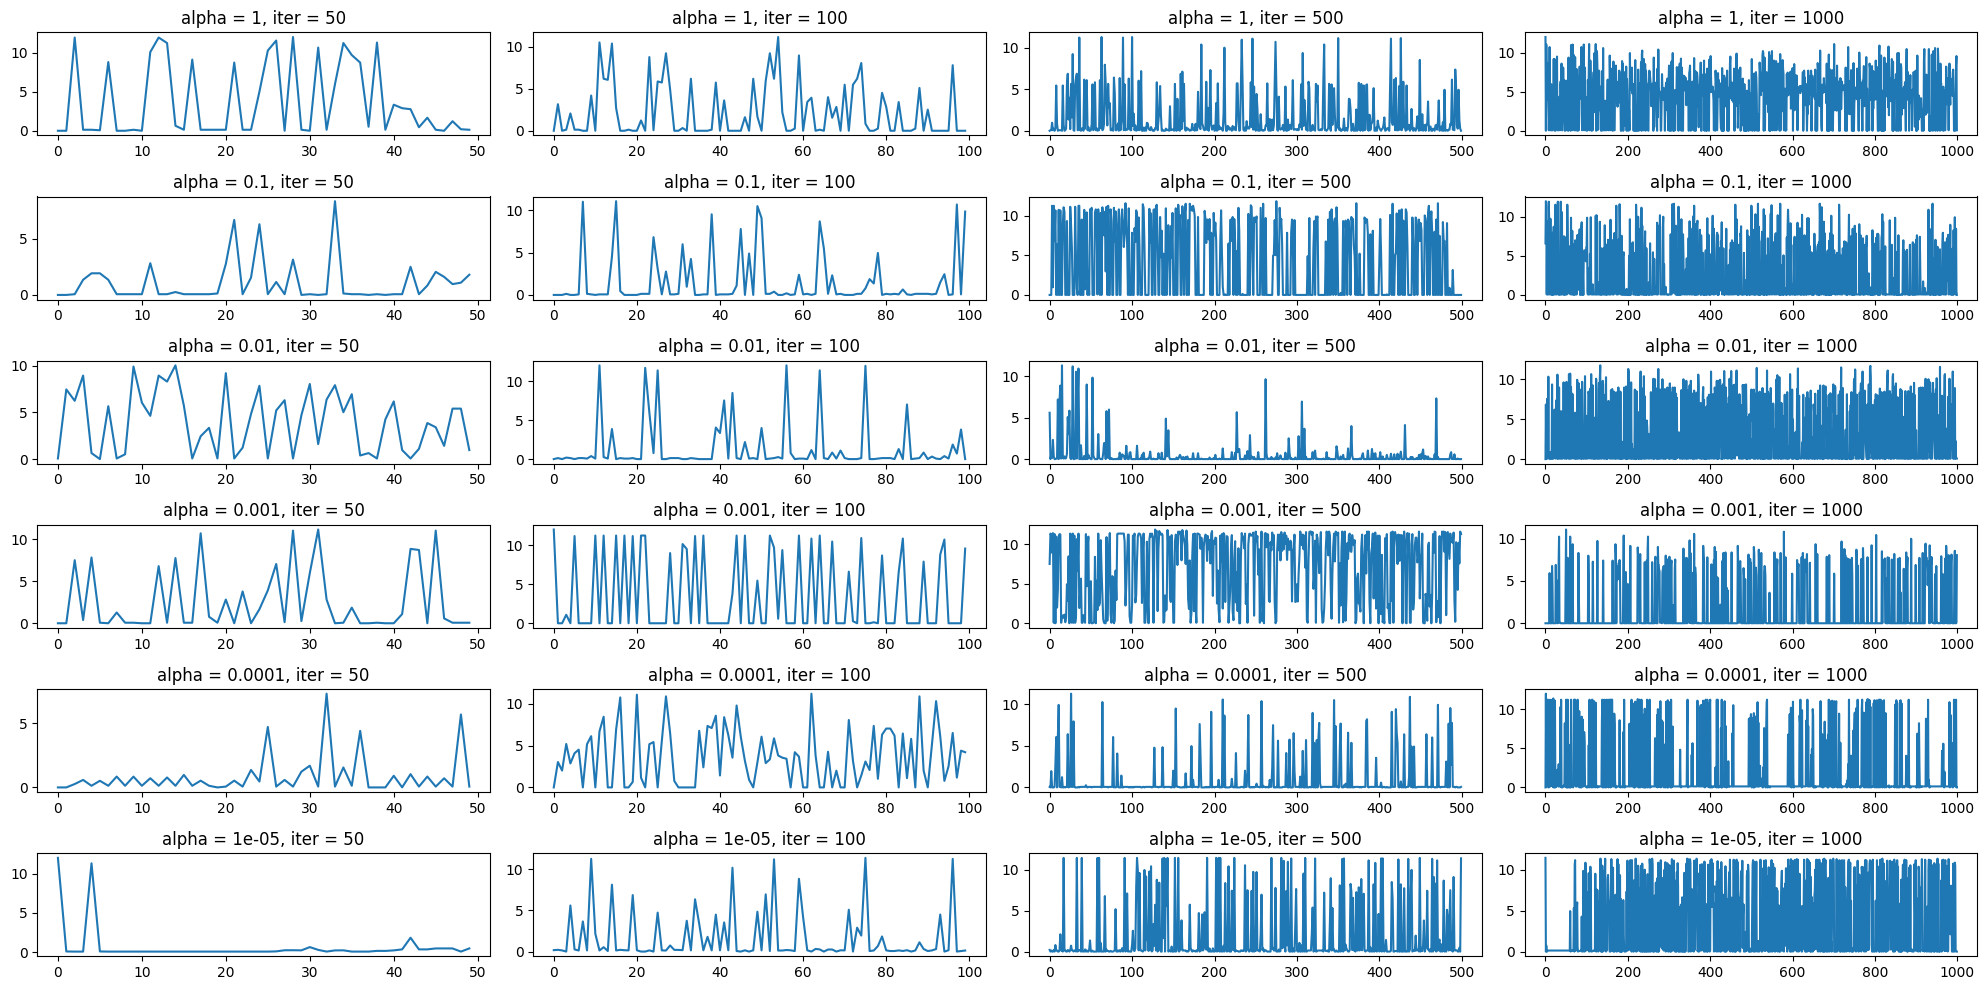

In [28]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(loss_arr[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

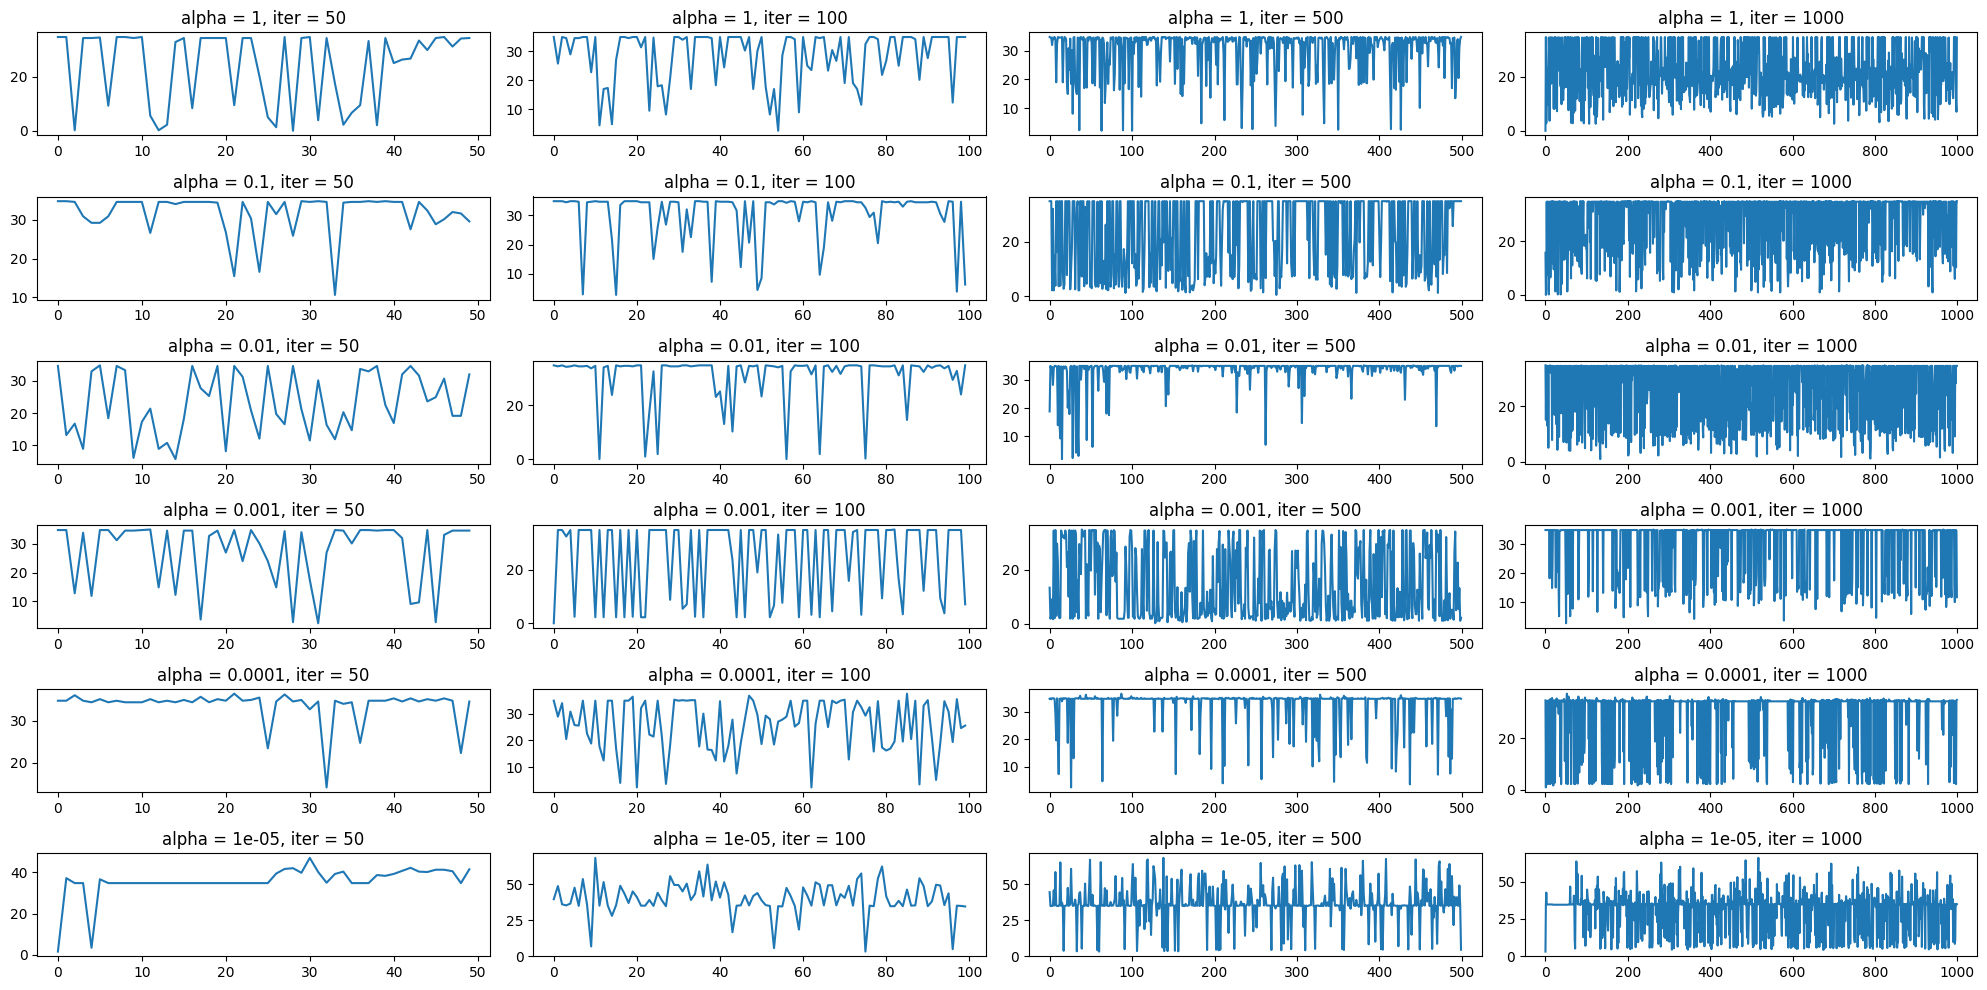

In [29]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(train_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

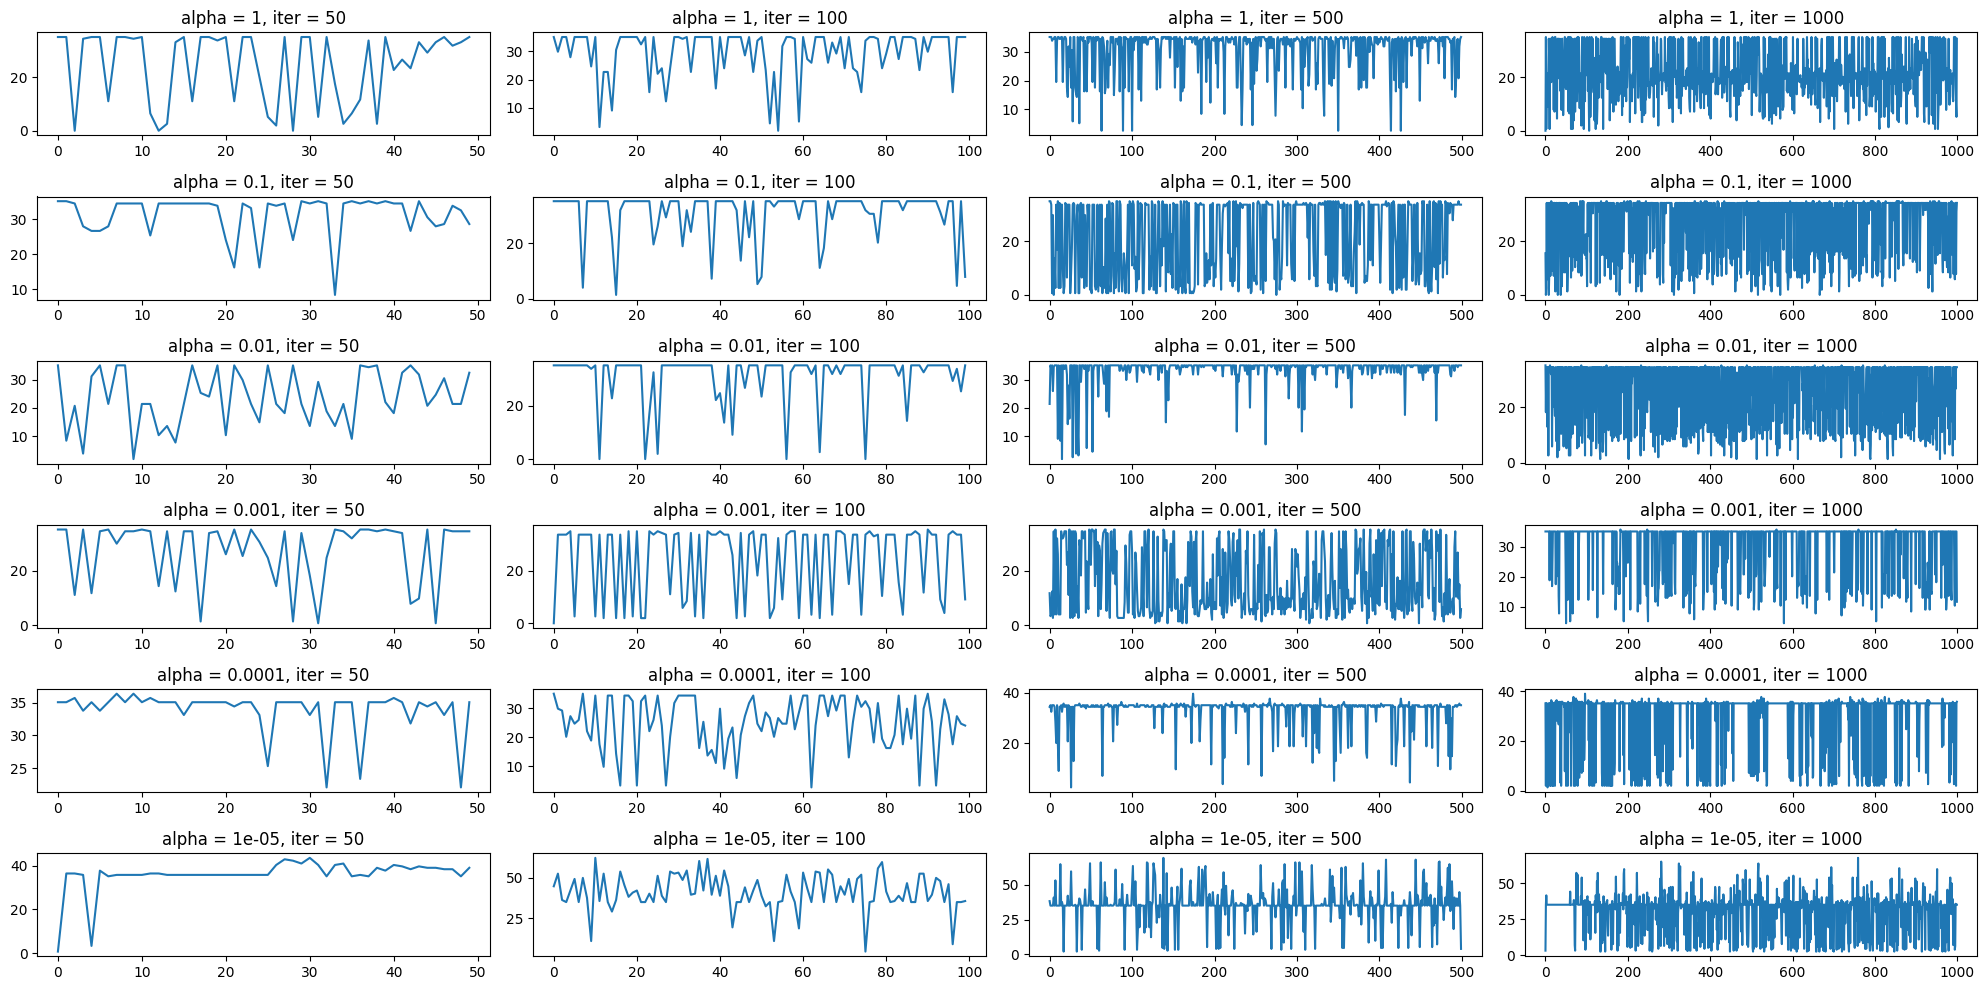

In [30]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(val_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

In [31]:
# Make a df of the accuracies
accur_df_32 = pd.DataFrame(accur_arr, columns = iters, index = alpha)
accur_df_32


50         100        500        1000
1.00000  35.064935  35.064935  35.064935  35.064935
0.10000  29.870130   5.194805  35.064935  35.064935
0.01000  28.571429  35.064935  35.064935  35.064935
0.00100  35.064935   9.090909   3.896104  10.389610
0.00010  35.064935  24.675325  35.064935  35.064935
0.00001  33.766234  35.064935   6.493506  36.363636

### Batch-Size = 16

In [32]:
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = [50, 100, 500, 1000]

accur_arr = []
train_accur = []
val_accur = []
loss_arr = []
for i in alpha:
    temp_arr = []
    temp_arr1 = []
    temp_arr2 = []
    temp_arr3 = []
    for j in iters:
        accur, accur_sk, loss_val, train_acc, val_acc = LR_batch(i, j, 16)
        temp_arr.append(accur)
        temp_arr2.append(train_acc)
        temp_arr1.append(loss_val)
        temp_arr3.append(val_acc)
    accur_arr.append(temp_arr)
    train_accur.append(temp_arr2)
    loss_arr.append(temp_arr1)
    val_accur.append(temp_arr3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dis

loss: 0.06431801935737594 	
--->Accuracy for 1 LR & 50 iter is: 27.27272727272727
Confusion Matrix: 
[[ 0  0  0]
 [ 8  0 42]
 [ 6  0 21]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.33      0.78      0.47        27

    accuracy                           0.27        77
   macro avg       0.11      0.26      0.16        77
weighted avg       0.12      0.27      0.16        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 9.776338942321086 	
--->Accuracy for 1 LR & 100 iter is: 16.883116883116884
Confusion Matrix: 
[[ 0  0  0]
 [30  0 20]
 [14  0 13]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.39      0.48      0.43        27

    accuracy          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy by sklearn: 0.6883116883116883
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 0.06431801935737592 	
loss: 0.06431801935737592 	
loss: 0.12863603871475146 	
loss: 0.06431801935737592 	
--->Accuracy for 1 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7532467532467533
---------------------------------------------------------

loss: 11.963151600471855 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.1929540580721271 	
loss: 11.127017348825975 	
loss: 3.4795257922609673e-16 	
loss: 6.045893819593304 	
loss: 1.9295405807212673 	
loss: 0.5145441548590051 	
loss: 3.4795257922609673e-16 	
loss: 2.6370387936523985 	
loss: 3.4795257922609673e-16 	
--->Accuracy for 1 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7012987012987013
---------------------------------------------------------

loss: 0.06431801935737594 	
--->Accuracy for 0.1 LR & 50 iter is: 29.87012987012987
Confusion Matrix: 
[[ 0  0  0]
 [ 8  0 42]
 [ 4  0 23]]
              precision    recall  f1-score   support

        -1.0       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 11.3199714068981 	
loss: 3.473173045298281 	
loss: 0.06431801935737592 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.06431801935737592 	
loss: 4.566579374373666 	
--->Accuracy for 0.1 LR & 500 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [14  0 36]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.42      0.96      0.58        27

    accuracy                           0.34        77
   macro avg       0.14      0.32      0.19        77
weighted avg       0.15      0.34      0.20        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------

loss: 5.852939761521177 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.5788621742163805 	
loss: 0.12863603871475146 	
loss: 0.06431801935737592 	
loss: 1.8652225613638915 	
loss: 0.19295405807212704 	
loss: 6.045893819593304 	
loss: 0.06431801935737592 	
loss: 0.06431801935737592 	
loss: 0.25727207742950264 	
--->Accuracy for 0.1 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------

loss: 0.06431801935737591 	
--->Accuracy for 0.01 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

--->Accuracy for 0.01 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.8311688311688312
---------------------------------------------------------

loss: 0.19326673523497734 	
loss: 3.4795257922609673e-16 	
loss: 0.38596579778061674 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.4502261355016293 	
loss: 10.61247319396697 	
--->Accuracy for 0.01 LR & 500 iter is: 1.2987012987012987
Confusion Matrix: 
[[ 0  0  0]
 [47  0  3]
 [26  0  1]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.25      0.04      0.06        27

    accuracy                           0.01        77
   macro avg       0.08      0.01      0.02        77
weighted avg       0.09      0.01      0.02        77

--->Accuracy by sklearn: 0.7142857142857143
---------------------------------------------------------

loss: 9.583906250116925 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.06431801935737591 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 3.4795257922609673e-16 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.12863603871475143 	
loss: 0.06431801935737591 	
loss: 3.4795257922609673e-16 	
--->Accuracy for 0.01 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.8311688311688312
---------------------------------------------------------

loss: 2.5737564308693566 	
--->Accuracy for 0.001 LR & 50 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [27  3 20]
 [ 4  0 23]]
              precision    recall  f1-score   support

        -1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.57      0.15      0.24        27

    accuracy                           0.05        77
   macro avg       0.19      0.05      0.08        77
weighted avg       0.20      0.05      0.08        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 1.1577244028273528 	
loss: 9.970272748741888 	
loss: 0.12863603871475146 	
loss: 0.38592620010514495 	
--->Accuracy for 0.001 LR & 500 iter is: 6.493506493506493
Confusion Matrix: 
[[ 0  0  0]
 [45  0  5]
 [22  0  5]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.50      0.19      0.27        27

    accuracy                           0.06

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.06431802329938892 	
loss: 0.19295855105335194 	
loss: 0.12863807814594216 	
loss: 0.06431801935737594 	
loss: 0.06431801935737594 	
loss: 0.25727342992943464 	
loss: 1.9181652383588592e-08 	
loss: 0.12863603982197477 	
loss: 1.0958984625480162e-09 	
--->Accuracy for 0.001 LR & 1000 iter is: 28.57142857142857
Confusion Matrix: 
[[ 0  0  0]
 [17  0 33]
 [ 5  0 22]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.40      0.81      0.54        27

    accuracy                           0.29        77
   macro avg       0.13      0.27      0.18        77
weighted avg       0.14      0.29      0.19        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 0.12863603871567544 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy for 0.0001 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 5.8760679970949625e-09 	
--->Accuracy for 0.0001 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 6.581271300431159 	
loss: 9.94331972499325 	
loss: 0.12866827431401065 	
loss: 10.682878039312364 	
loss: 10.175307384912673 	
--->Accuracy for 0.0001 LR & 500 iter is: 0.0
Confusion Matrix: 
[[ 0  0  0]
 [49  0  1]
 [27  0  0]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       0.0
         0.0       0.00      0.00      0.00      50.0
         1.0       0.00      0.00      0.00      27.0

    accuracy                           0.00      77.0
   macro avg       0.00      0.00      0.00      77.0
weighted 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


loss: 0.06431801935739355 	
loss: 10.178520158483478 	
loss: 1.4238576478109666 	
loss: 1.7520910300737043 	
loss: 2.1391443770626712 	
loss: 0.06431801935738639 	
loss: 1.1751350377556982 	
loss: 3.045180542073019 	
loss: 0.06431801935738472 	
--->Accuracy for 0.0001 LR & 1000 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 0  0 50]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.34      0.96      0.50        27

    accuracy                           0.34        77
   macro avg       0.11      0.32      0.17        77
weighted avg       0.12      0.34      0.18        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 3.491271537563634 	
--->Accuracy for 1e-05 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    rec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy by sklearn: 0.8571428571428571
---------------------------------------------------------

loss: 7.445702599226053 	
--->Accuracy for 1e-05 LR & 100 iter is: 36.36363636363637
Confusion Matrix: 
[[ 1 49]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.36      1.00      0.52        27

    accuracy                           0.36        77
   macro avg       0.68      0.51      0.28        77
weighted avg       0.77      0.36      0.21        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 7.317378540111455 	
loss: 0.08580696334392554 	
loss: 0.08614608026988455 	
loss: 0.08643259916984994 	
loss: 0.08809952507832065 	
--->Accuracy for 1e-05 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 1 49]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        50

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


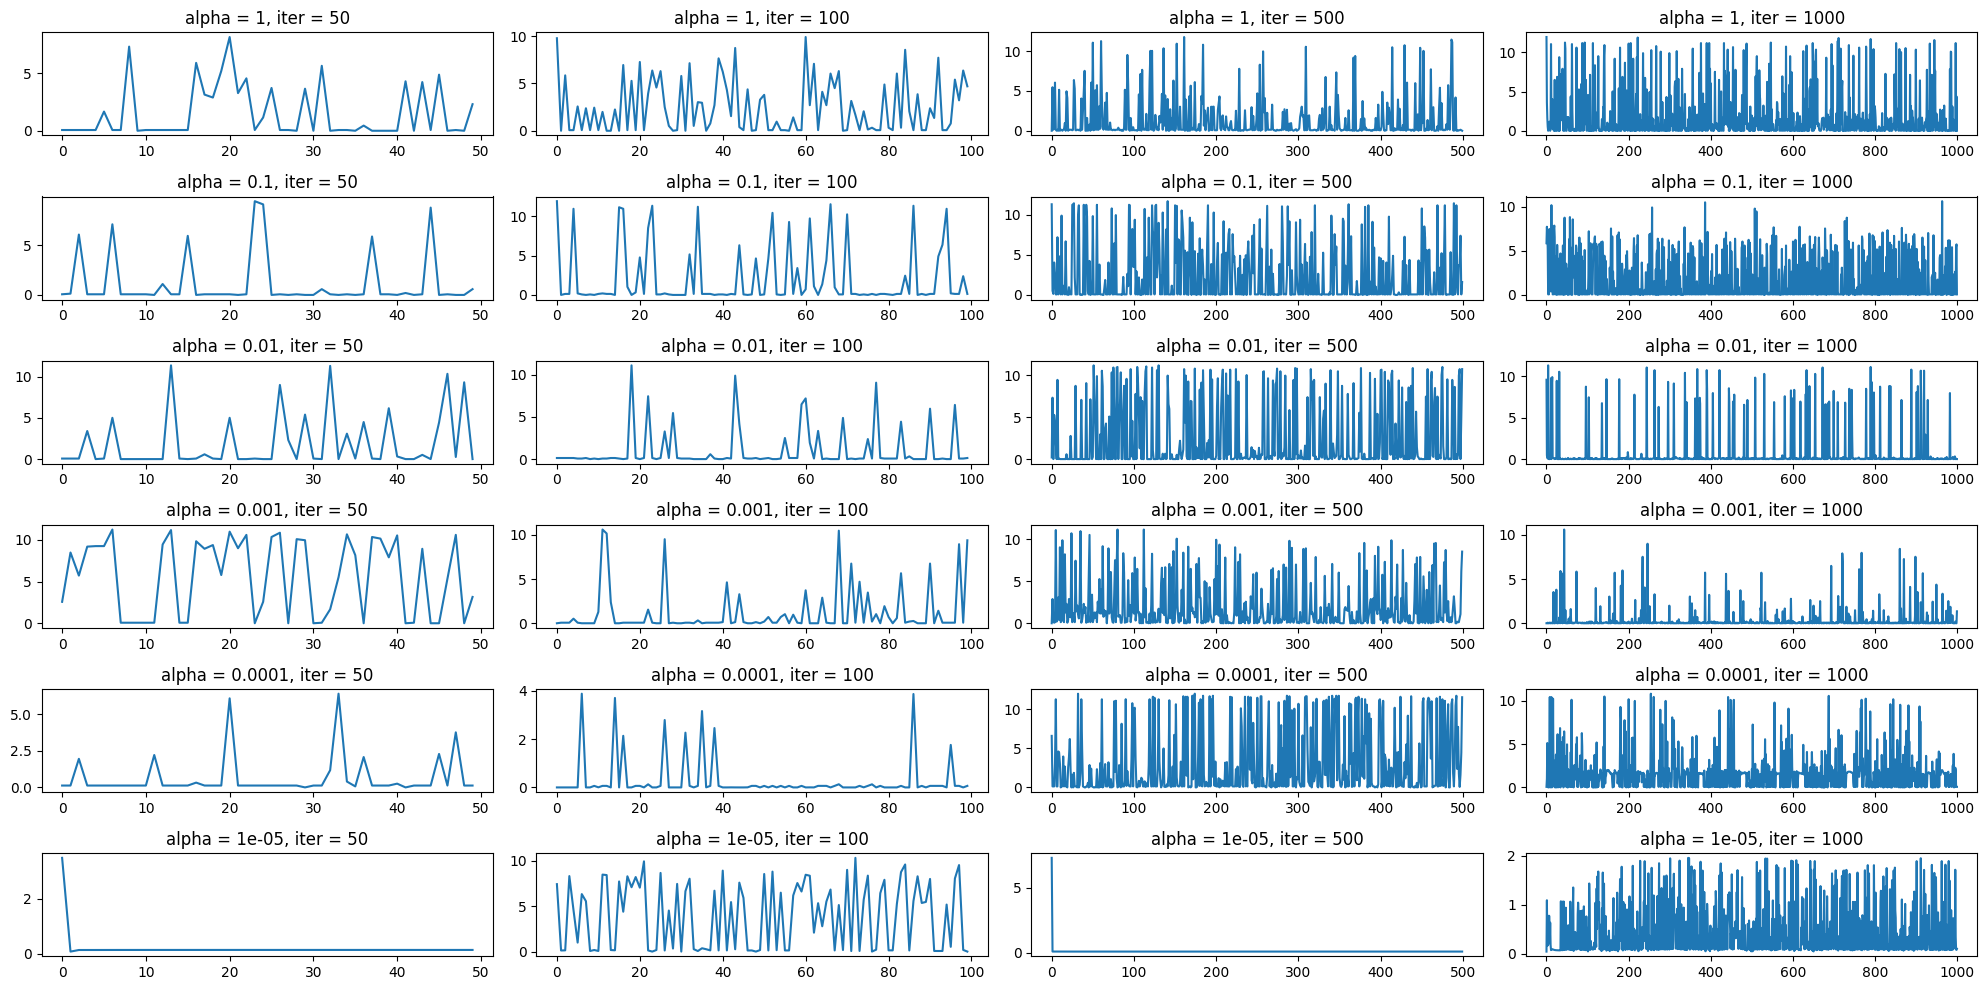

In [33]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(loss_arr[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

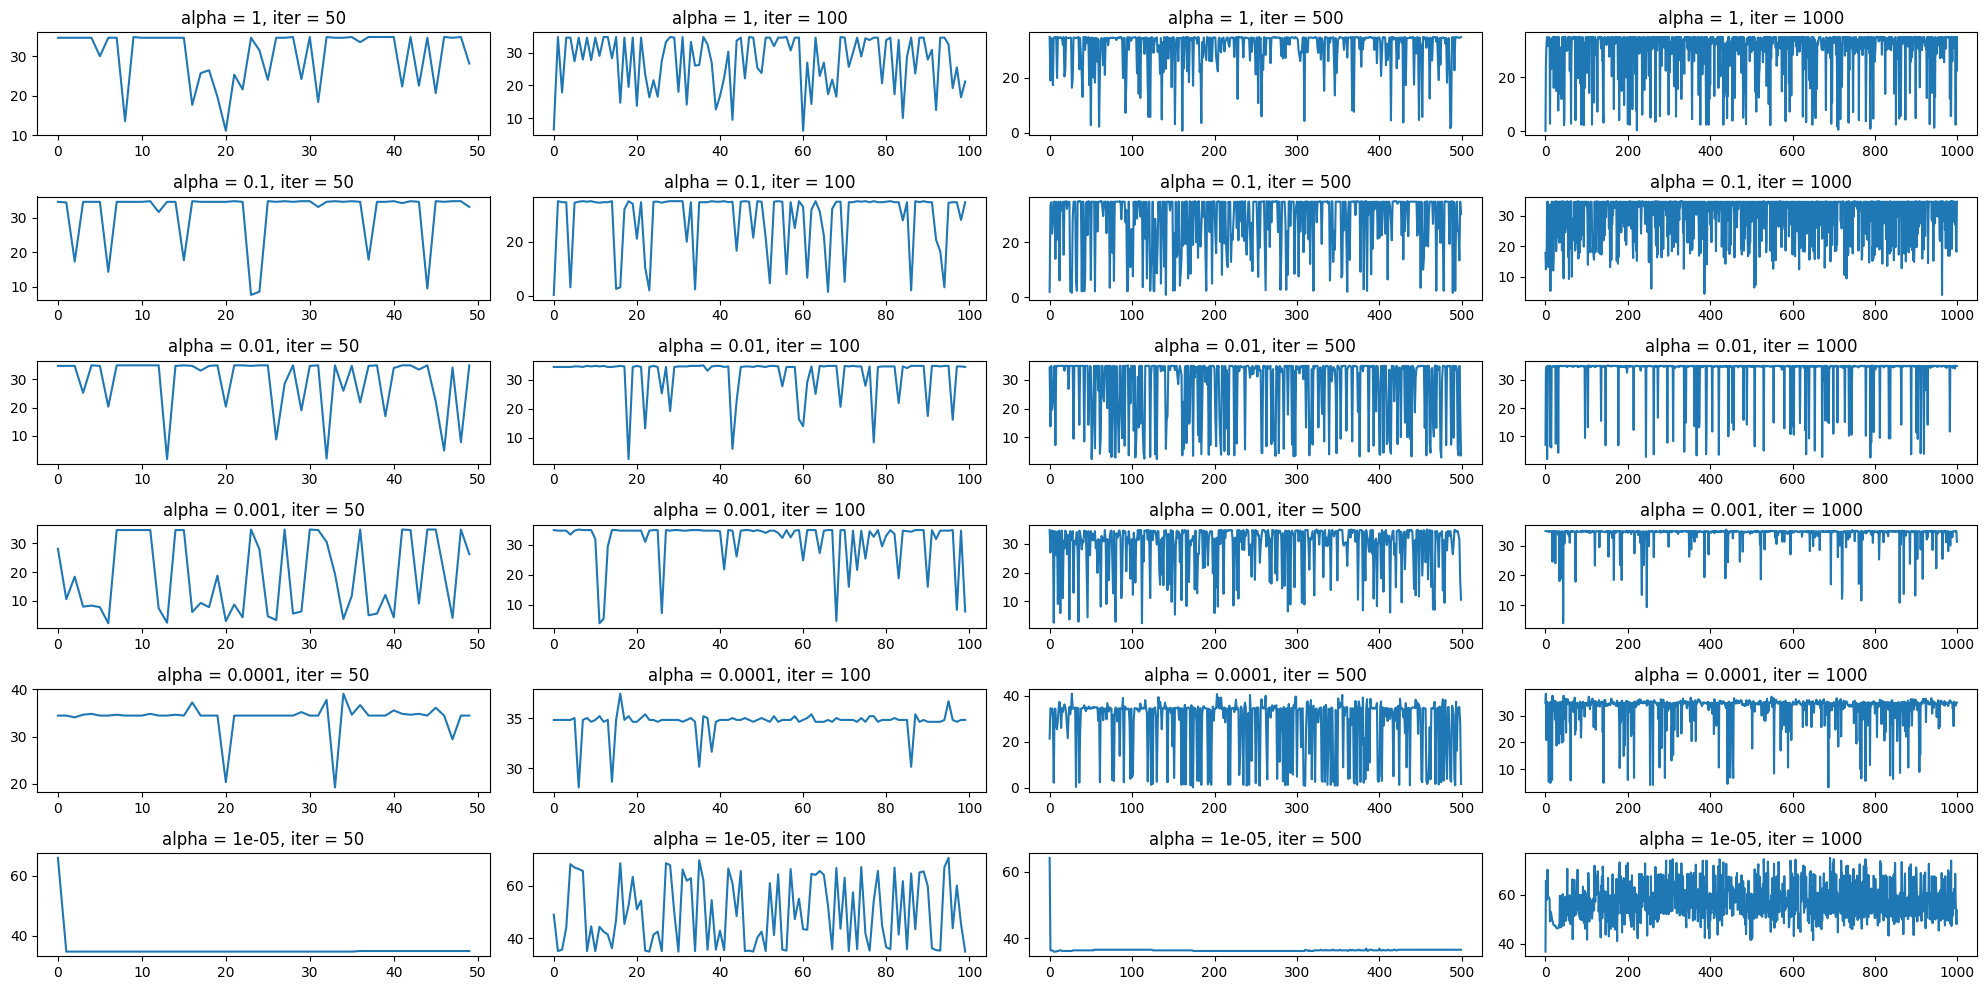

In [34]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(train_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

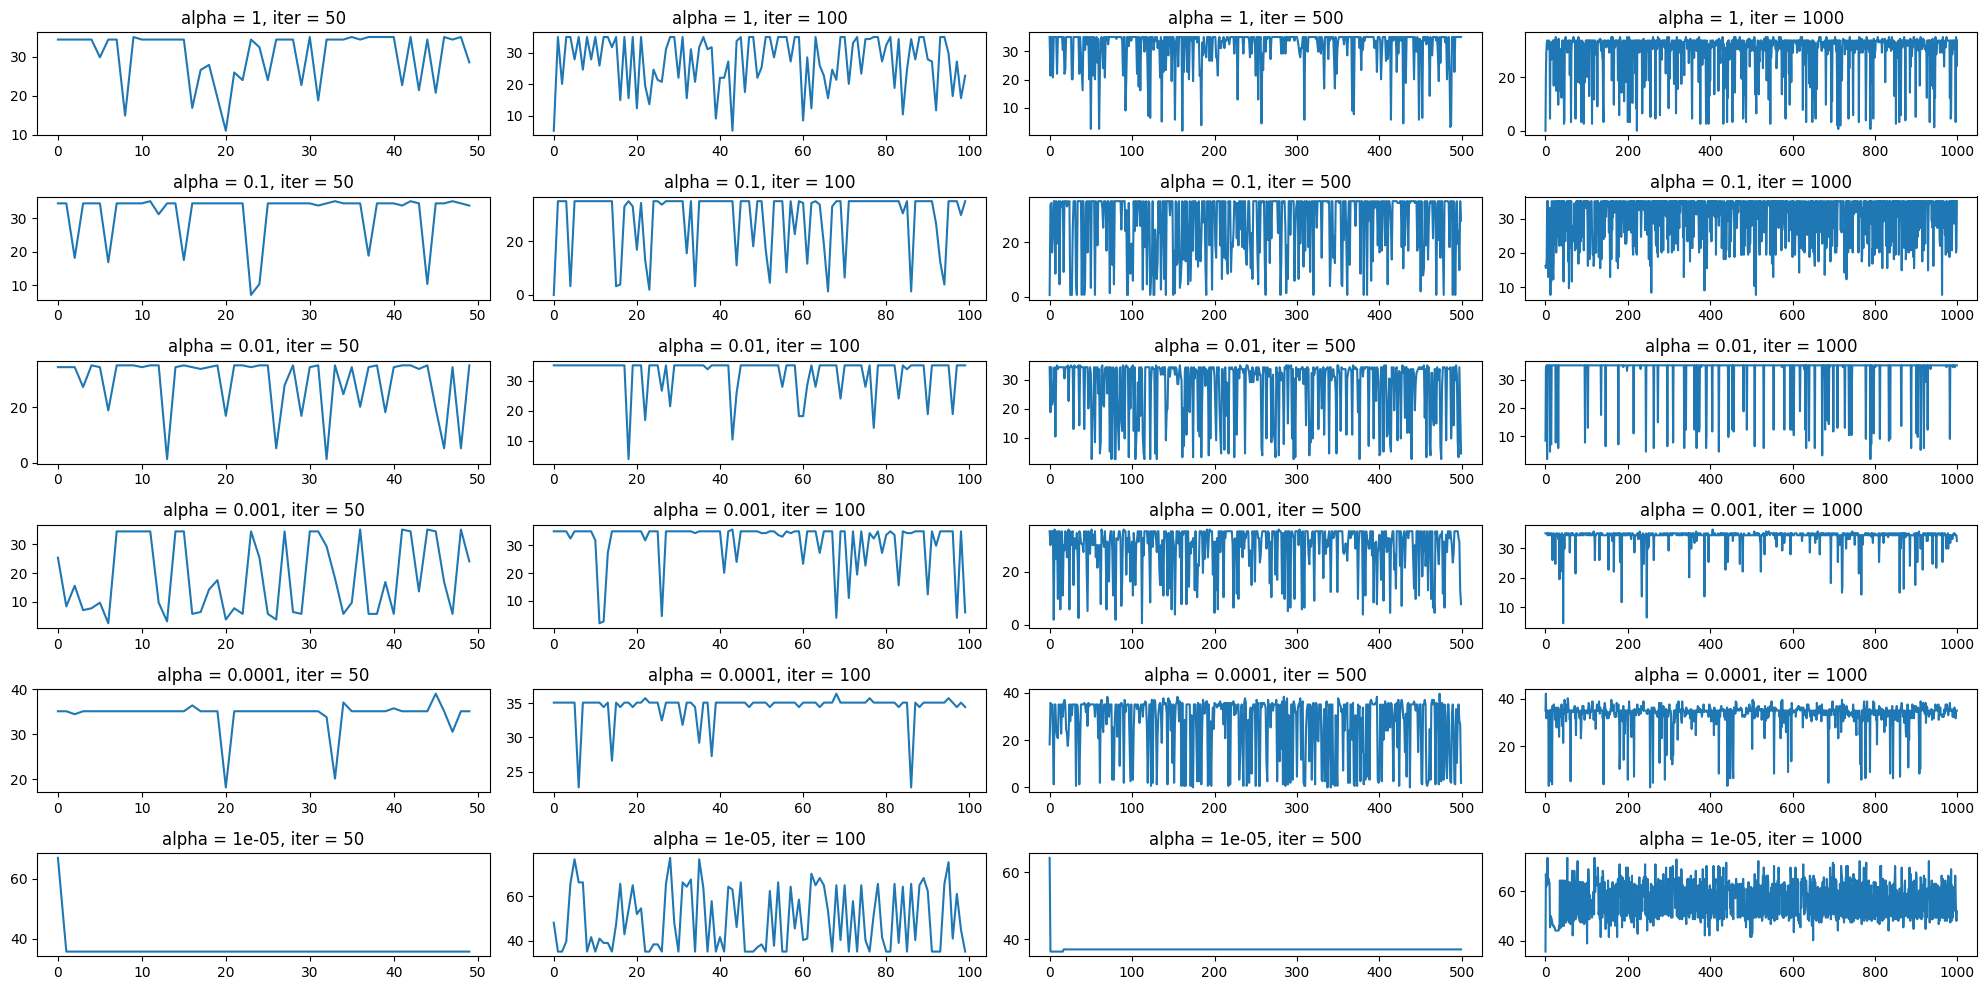

In [35]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(val_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

In [36]:
# Make a df of the accuracies
accur_df_16 = pd.DataFrame(accur_arr, columns = iters, index = alpha)
accur_df_16

50         100        500        1000
1.00000  27.272727  16.883117  35.064935  35.064935
0.10000  29.870130  35.064935  33.766234  35.064935
0.01000  35.064935  35.064935   1.298701  35.064935
0.00100  33.766234   5.194805   6.493506  28.571429
0.00010  35.064935  35.064935   0.000000  33.766234
0.00001  35.064935  36.363636  35.064935  54.545455

### Batch-Size = 128

In [37]:
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
iters = [50, 100, 500, 1000]

accur_arr = []
train_accur = []
val_accur = []
loss_arr = []
for i in alpha:
    temp_arr = []
    temp_arr1 = []
    temp_arr2 = []
    temp_arr3 = []
    for j in iters:
        accur, accur_sk, loss_val, train_acc, val_acc = LR_batch(i, j, 128)
        temp_arr.append(accur)
        temp_arr2.append(train_acc)
        temp_arr1.append(loss_val)
        temp_arr3.append(val_acc)
    accur_arr.append(temp_arr)
    train_accur.append(temp_arr2)
    loss_arr.append(temp_arr1)
    val_accur.append(temp_arr3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dis

loss: 3.4795257922609673e-16 	
--->Accuracy for 1 LR & 50 iter is: 18.181818181818183
Confusion Matrix: 
[[ 0  0  0]
 [26  0 24]
 [13  0 14]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.37      0.52      0.43        27

    accuracy                           0.18        77
   macro avg       0.12      0.17      0.14        77
weighted avg       0.13      0.18      0.15        77

--->Accuracy by sklearn: 0.7402597402597403
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 1 LR & 100 iter is: 24.675324675324674
Confusion Matrix: 
[[ 0  0  0]
 [16  0 34]
 [ 8  0 19]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      0.70      0.48        27

    accuracy 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 3.022946909796652 	
loss: 0.12863603871475152 	
loss: 7.460890245455567 	
--->Accuracy for 1 LR & 500 iter is: 24.675324675324674
Confusion Matrix: 
[[ 0  0  0]
 [29  0 21]
 [ 8  0 19]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.47      0.70      0.57        27

    accuracy                           0.25        77
   macro avg       0.16      0.23      0.19        77
weighted avg       0.17      0.25      0.20        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 0.6431801935737561 	
loss: 0.1286360387147515 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 2.379766716222896 	
loss: 0.38590811614425374 	
loss: 0.5145441548590048 	
loss: 0.7074982129311316 	
loss: 0.5145441548590048 	
loss: 0.5145441548590048 	
loss: 0.5145441548590048 	
--->Accuracy for 1 LR & 1000 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [12  0 38]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.41      0.96      0.57        27

    accuracy                           0.34        77
   macro avg       0.14      0.32      0.19        77
weighted avg       0.14      0.34      0.20        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------

loss: 3.4795257922609673e-16 	


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy for 0.1 LR & 50 iter is: 14.285714285714285
Confusion Matrix: 
[[ 0  0  0]
 [23  0 27]
 [16  0 11]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.29      0.41      0.34        27

    accuracy                           0.14        77
   macro avg       0.10      0.14      0.11        77
weighted avg       0.10      0.14      0.12        77

--->Accuracy by sklearn: 0.7662337662337663
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.1 LR & 100 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 1.4149964258622627 	
loss: 1.2220423677901362 	
loss: 0.9647751711899556 	
loss: 1.0934063290753853 	
loss: 1.093406329075385 	
loss: 1.3506784065048874 	
loss: 1.2220423677901362 	
--->Accuracy for 0.1 LR & 1000 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.35      0.96      0.51        27

    accuracy                           0.34        77
   macro avg       0.12      0.32      0.17        77
weighted avg       0.12      0.34      0.18        77

--->Accuracy by sklearn: 0.7532467532467533
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.01 LR & 50 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    recall  f1-score   support

           0       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy by sklearn: 0.8051948051948052
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.01 LR & 100 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 7  0 43]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.38      0.96      0.54        27

    accuracy                           0.34        77
   macro avg       0.13      0.32      0.18        77
weighted avg       0.13      0.34      0.19        77

--->Accuracy by sklearn: 0.8311688311688312
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 7.396572226098191 	
loss: 0.19295405807212704 	
loss: 0.06431801935737591 	
loss: 0.5788621742163805 	
--->Accuracy for 0.01 LR & 500 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0 50]
 [ 0 27]]
              precision    reca

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 0.12863603871475146 	
loss: 3.4795257922609673e-16 	
loss: 4.695215413088417 	
loss: 0.12863603871475146 	
loss: 4.373625316301539 	
loss: 1.543632464577014 	
loss: 3.794763142085159 	
loss: 4.3736253163028564 	
loss: 0.12863603871475146 	
--->Accuracy for 0.01 LR & 1000 iter is: 19.480519480519483
Confusion Matrix: 
[[ 0  0  0]
 [31  0 19]
 [12  0 15]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.44      0.56      0.49        27

    accuracy                           0.19        77
   macro avg       0.15      0.19      0.16        77
weighted avg       0.15      0.19      0.17        77

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.001 LR & 50 iter is: 25.97402597402597
Confusion Matrix: 
[[ 0  0  0]
 [13  0 37]
 [ 7  0 20]]
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy for 0.001 LR & 100 iter is: 29.87012987012987
Confusion Matrix: 
[[ 0  0  0]
 [16  0 34]
 [ 4  0 23]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.40      0.85      0.55        27

    accuracy                           0.30        77
   macro avg       0.13      0.28      0.18        77
weighted avg       0.14      0.30      0.19        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
loss: 0.8361484957132389 	
loss: 0.06431801935737592 	
loss: 0.9647702903606339 	
loss: 5.917257780878553 	
--->Accuracy for 0.001 LR & 500 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.5145701055774563 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
loss: 0.06431801935737591 	
--->Accuracy for 0.001 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy by sklearn: 0.7922077922077922
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.0001 LR & 50 iter is: 33.76623376623377
Confusion Matrix: 
[[ 0  0  0]
 [ 0  0 50]
 [ 1  0 26]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.34      0.96      0.50        27

    accuracy                           0.34        77
   macro avg       0.11      0.32      0.17        77
weighted avg       0.12      0.34      0.18        77

--->Accuracy by sklearn: 0.7792207792207793
---------------------------------------------------------

loss: 3.4795257922609673e-16 	
--->Accuracy for 0.0001 LR & 100 iter is: 29.87012987012987
Confusion Matrix: 
[[ 0  0  0]
 [ 5  0 45]
 [ 4  0 23]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


loss: 3.9903719683070857 	
loss: 3.151934924901736 	
loss: 1.9311542605994212 	
loss: 3.4795257922609673e-16 	
loss: 3.612430107801006 	
loss: 3.3476635792993927 	
--->Accuracy for 0.0001 LR & 1000 iter is: 35.064935064935064
Confusion Matrix: 
[[ 0  0  0]
 [ 1  0 49]
 [ 0  0 27]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        50
         1.0       0.36      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.12      0.33      0.17        77
weighted avg       0.12      0.35      0.18        77

--->Accuracy by sklearn: 0.7532467532467533
---------------------------------------------------------

loss: 2.8519635587321343e-06 	
--->Accuracy for 1e-05 LR & 50 iter is: 27.27272727272727
Confusion Matrix: 
[[ 0  0  0]
 [25  6 19]
 [ 5  7 15]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

--->Accuracy by sklearn: 0.7532467532467533
---------------------------------------------------------

loss: 4.779127210257644e-06 	
--->Accuracy for 1e-05 LR & 100 iter is: 36.36363636363637
Confusion Matrix: 
[[ 1 49]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.36      1.00      0.52        27

    accuracy                           0.36        77
   macro avg       0.68      0.51      0.28        77
weighted avg       0.77      0.36      0.21        77

--->Accuracy by sklearn: 0.8181818181818182
---------------------------------------------------------

loss: 1.097511995593871e-06 	
loss: 8.113485596451396 	
loss: 1.1222962528226366 	
loss: 2.0495186051560945 	
loss: 3.7778447543494127 	
--->Accuracy for 1e-05 LR & 500 iter is: 27.27272727272727
Confusion Matrix: 
[[ 0  0  0]
 [25  4 21]
 [ 7  3 17]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



loss: 1.272690683492217 	
loss: 1.401595032463215 	
loss: 1.4697623620075722 	
loss: 1.644233891004041 	
loss: 1.6471694096218894 	
loss: 1.6512211047754413 	
loss: 1.707276818542656 	
loss: 1.708738259089385 	
loss: 1.7101533435013951 	
--->Accuracy for 1e-05 LR & 1000 iter is: 29.87012987012987
Confusion Matrix: 
[[ 0  0  0]
 [ 8  2 40]
 [ 4  2 21]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.50      0.04      0.07        50
         1.0       0.34      0.78      0.48        27

    accuracy                           0.30        77
   macro avg       0.28      0.27      0.18        77
weighted avg       0.45      0.30      0.22        77

--->Accuracy by sklearn: 0.8051948051948052
---------------------------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


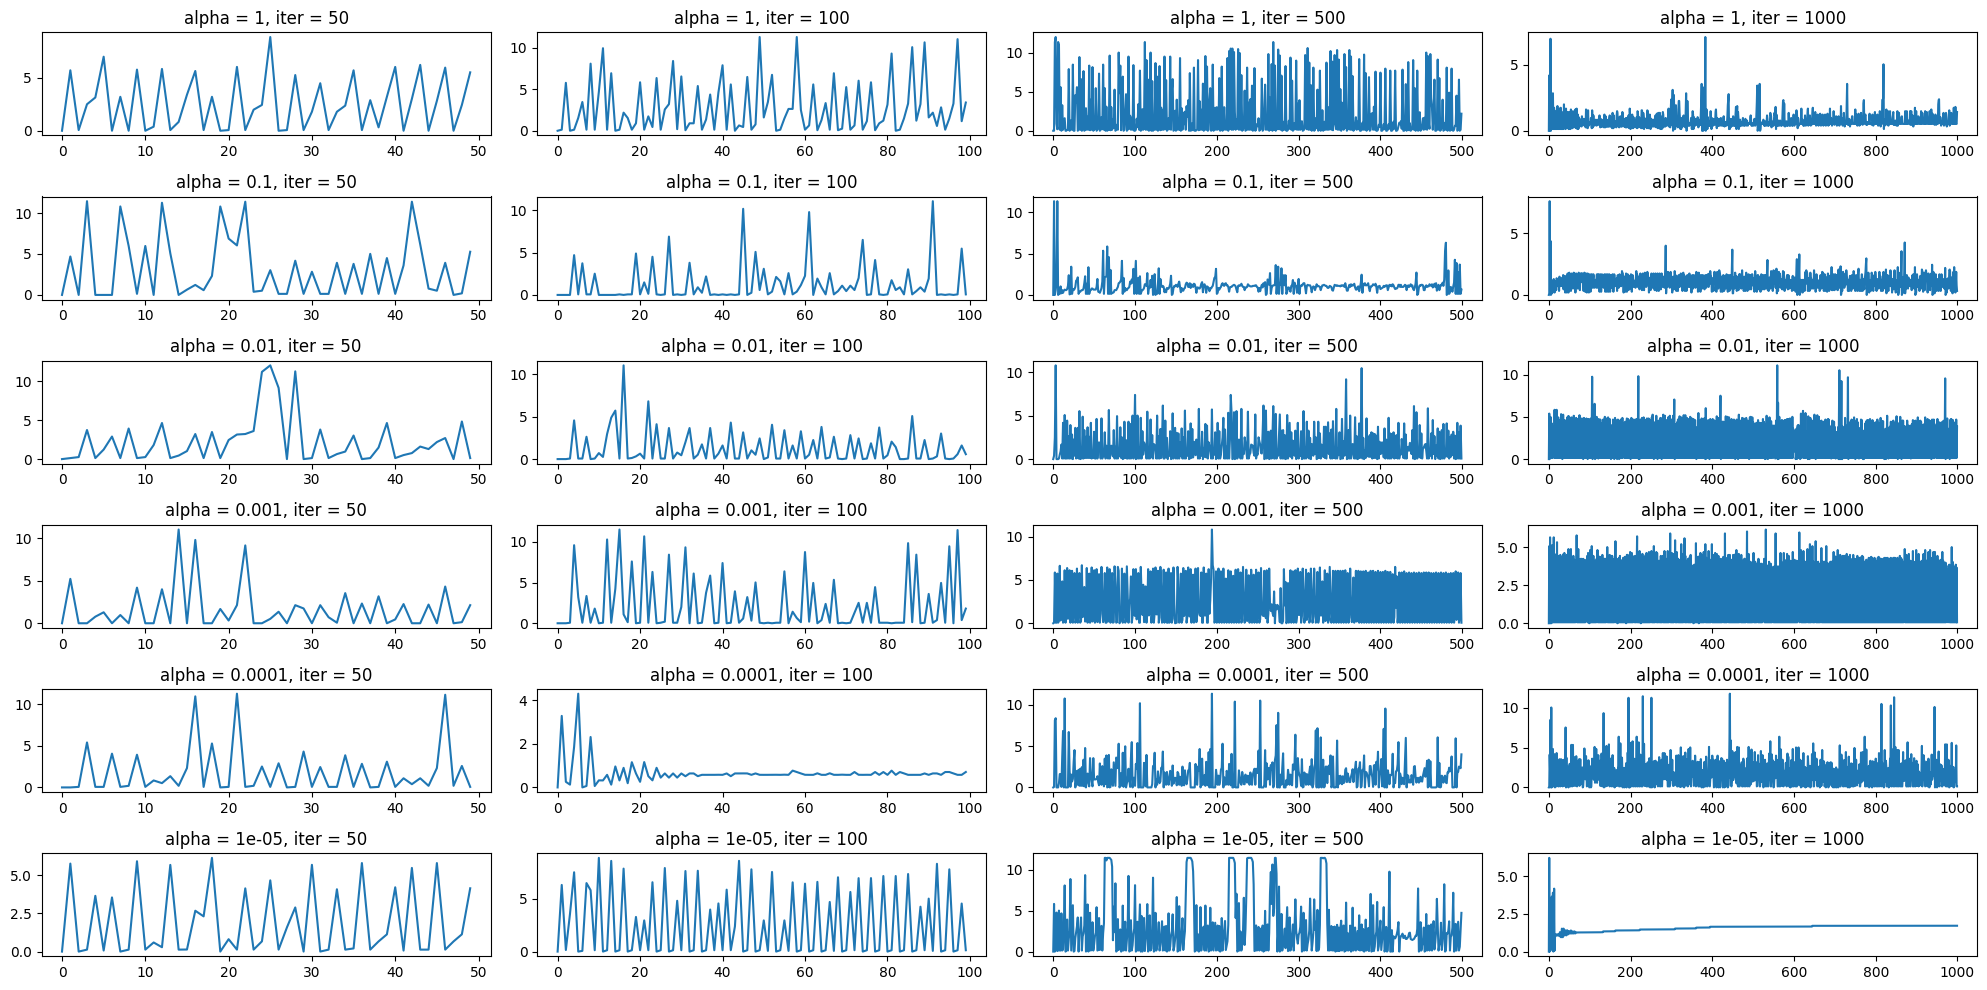

In [38]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(loss_arr[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

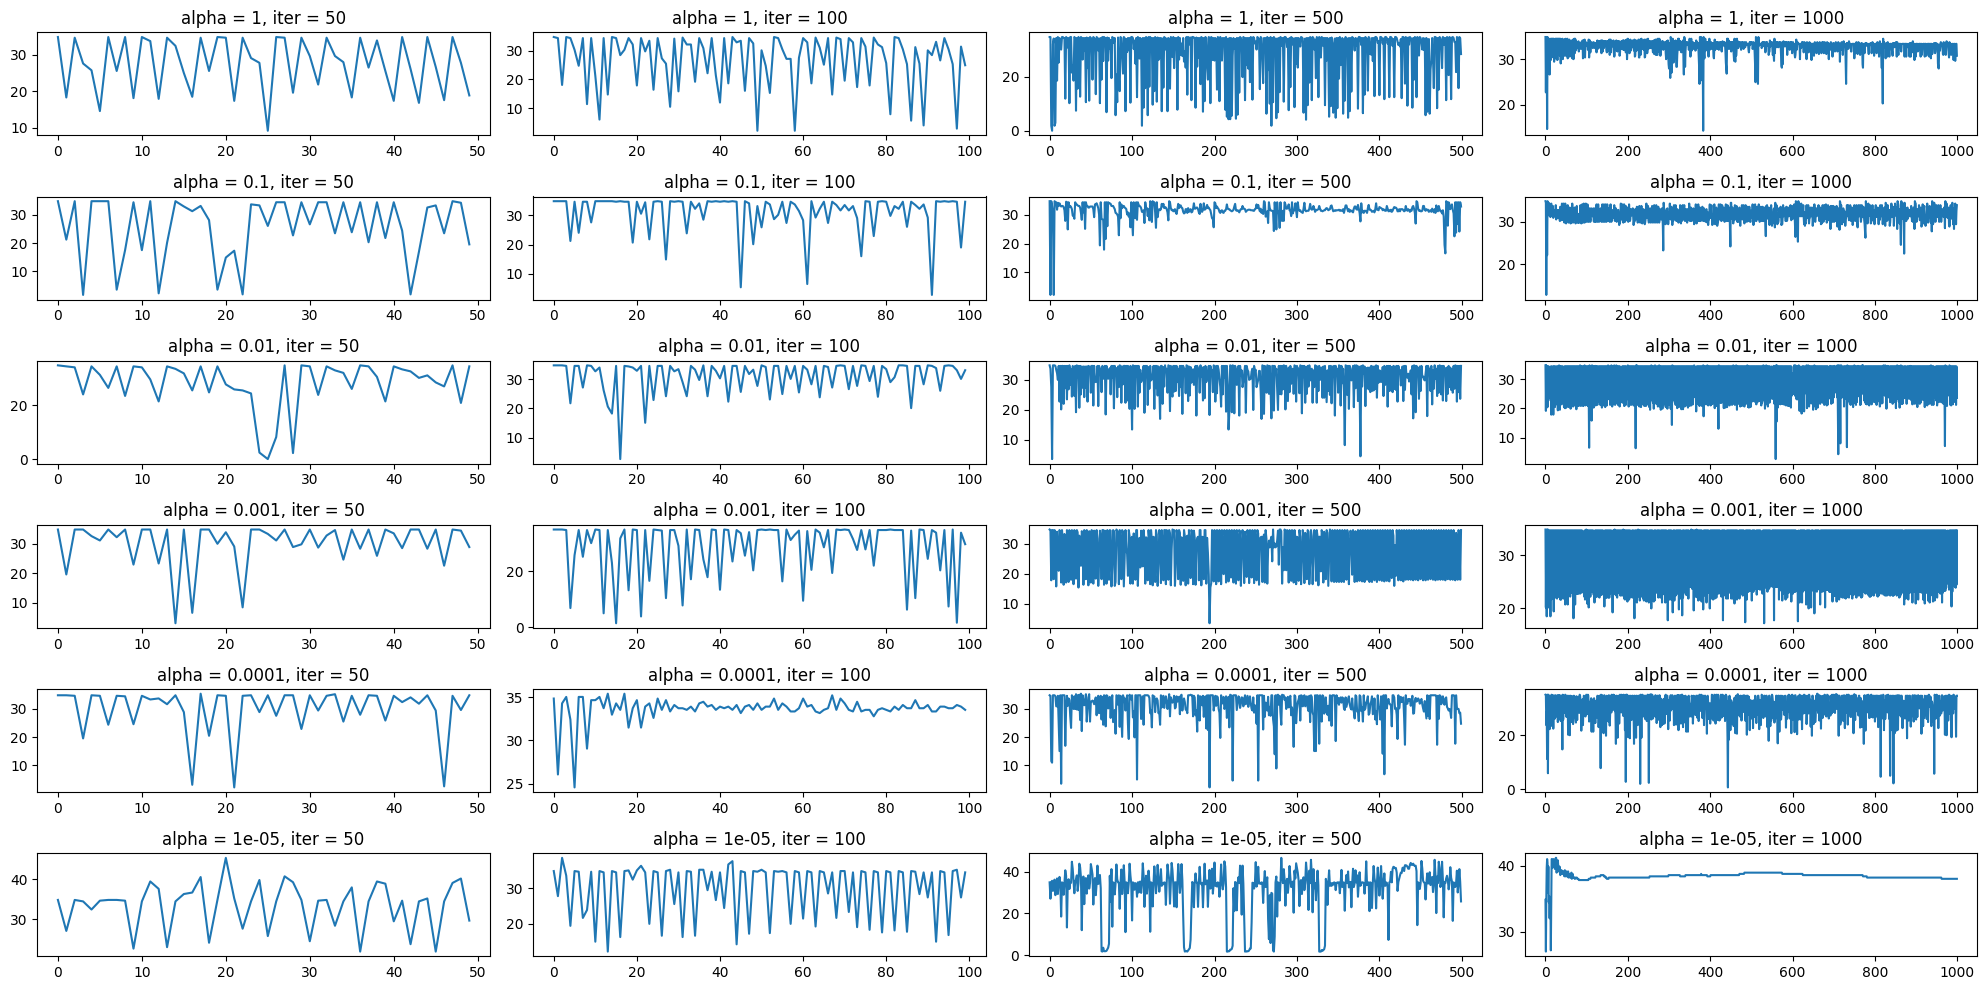

In [39]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(train_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

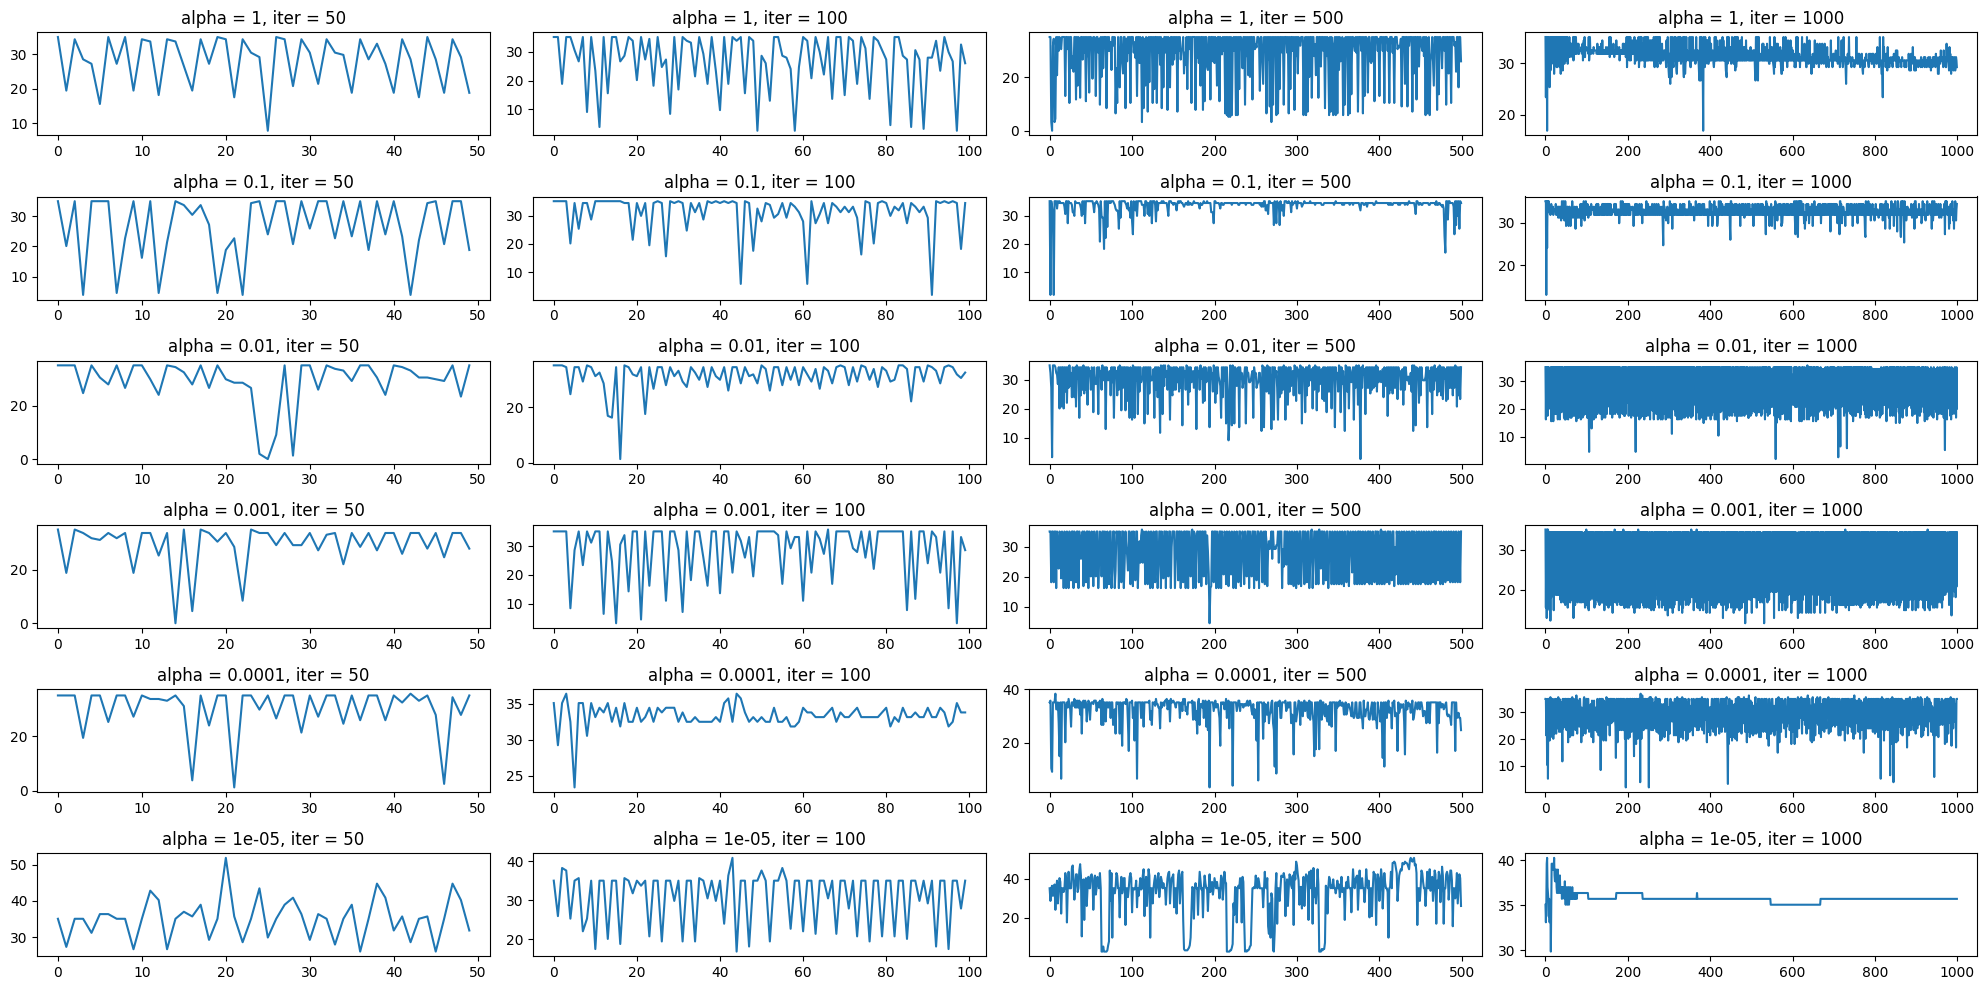

In [40]:
# Plotting 24 subplots
fig, axes = plt.subplots(6, 4, figsize = (20, 10))
for i in range(6):
    for j in range(4):
        axes[i][j].plot(val_accur[i][j], label = 'Loss')
        axes[i][j].set_title(f'alpha = {alpha[i]}, iter = {iters[j]}')
plt.tight_layout()
plt.show()

In [41]:
# Make a df of the accuracies
accur_df_128 = pd.DataFrame(accur_arr, columns = iters, index = alpha)
accur_df_128

50         100        500        1000
1.00000  18.181818  24.675325  24.675325  33.766234
0.10000  14.285714  35.064935  33.766234  33.766234
0.01000  35.064935  33.766234  35.064935  19.480519
0.00100  25.974026  29.870130  33.766234  35.064935
0.00010  33.766234  29.870130  24.675325  35.064935
0.00001  27.272727  36.363636  27.272727  29.870130